# TOC:
* [FDR corrected maps](#fdr-bullet)
* [TFCE corrected positive SV maps](#tfce_pos-bullet)
* [TFCE corrected negative SV maps](#tfce_neg-bullet)


In [1]:
# load modules
from scipy.stats import stats
import scipy.io as spio
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
from nilearn.input_data import NiftiMasker
import nilearn.plotting as plotting
from nilearn.image import mean_img
from nilearn import image
# import pickle
import pandas as pd
import seaborn as sns 

import nipype.pipeline.engine as pe
from nipype.interfaces import spm
from nipype.interfaces import fsl


%matplotlib inline 
%autosave 5
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})

/gpfs/ysm/project/rj299/conda_envs/py37_dev/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


200112-22:04:55,645 nipype.utils INFO:
	 Running nipype version 1.2.3 (latest: 1.4.0)


Autosaving every 5 seconds


In [2]:
from nipype.interfaces.matlab import MatlabCommand
MatlabCommand.set_default_paths('/home/rj299/project/MATLAB/toolbox/spm12/') # set default SPM12 path in my computer.

fsl.FSLCommand.set_default_output_type('NIFTI_GZ')

base_root = '/home/rj299/scratch60/mdm_analysis/'
data_root = '/home/rj299/project/mdm_analysis/data_rename'
out_root = '/home/rj299/scratch60/mdm_analysis/output'

# Subjects included in analysis
sub_num = [2073, 2550, 2582, 2583, 2584, 2585, 2588, 2592, 2593, 2594, 
           2596, 2597, 2598, 2599, 2600, 2624, 2650, 2651, 2652, 2653, 
           2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 
           2664, 2665, 2666]

sub_num.sort()
print('All subjects included in analysis:', sub_num)
print(len(sub_num), 'subjects')

All subjects included in analysis: [2073, 2550, 2582, 2583, 2584, 2585, 2588, 2592, 2593, 2594, 2596, 2597, 2598, 2599, 2600, 2624, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666]
33 subjects


In [3]:
# load anatomical
anat_mean = nib.load(os.path.join(out_root, 'imaging', 'all_sub_average.nii.gz'))

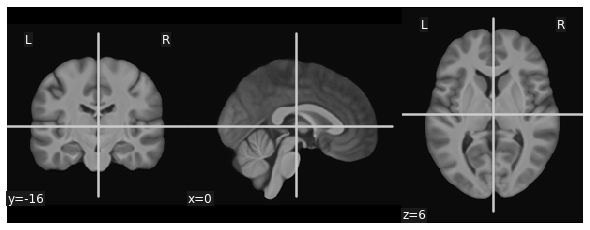

In [4]:
fig = plt.figure(figsize = (8,3))
plotting.plot_anat(anat_mean, black_bg = True, figure = fig)

### FDR thresholded <a class = "anchor" id = "fdr-bullet"></a>

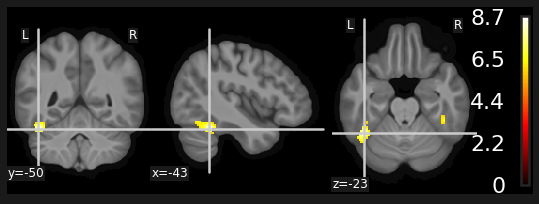

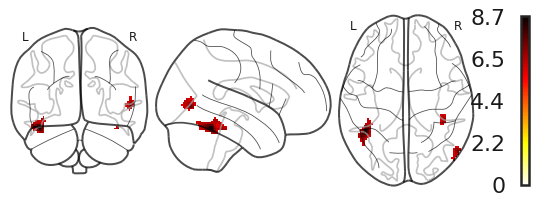

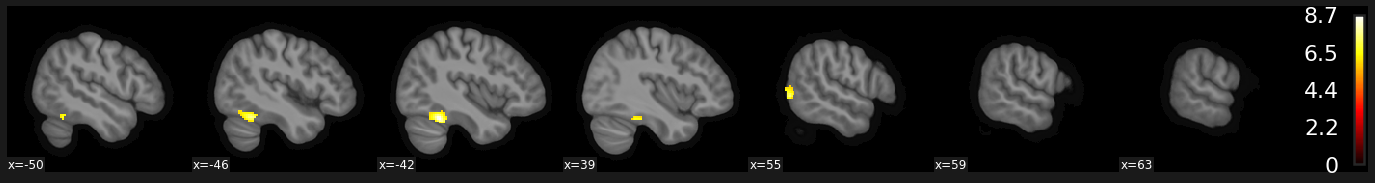

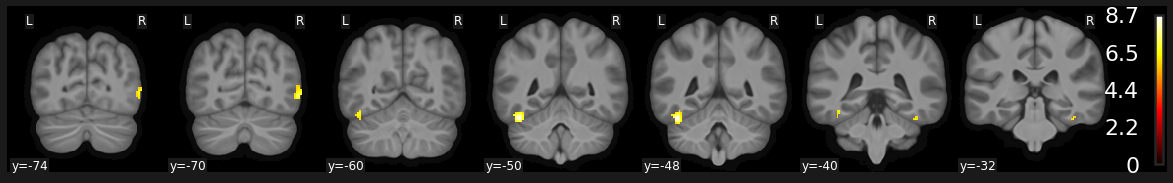

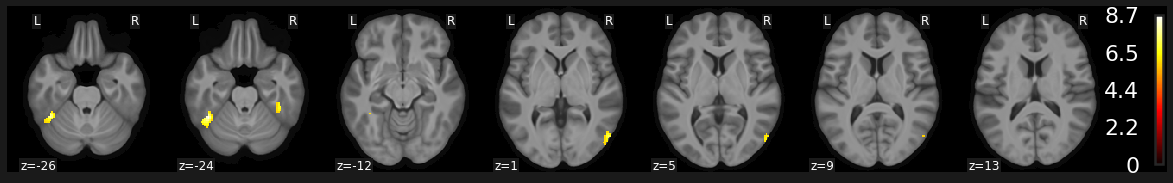

In [9]:
# second-level output: FDR corrected

con_id = '0009'
plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       anat_mean)

plotting.plot_glass_brain('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       colorbar = True)

plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       anat_mean,
                      display_mode = 'x')

plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       anat_mean,
                      display_mode = 'y')

plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001_thr.nii' %con_id,
                       anat_mean,
                      display_mode = 'z')

## Cluster extent

Without correction just voxel-wise threshold

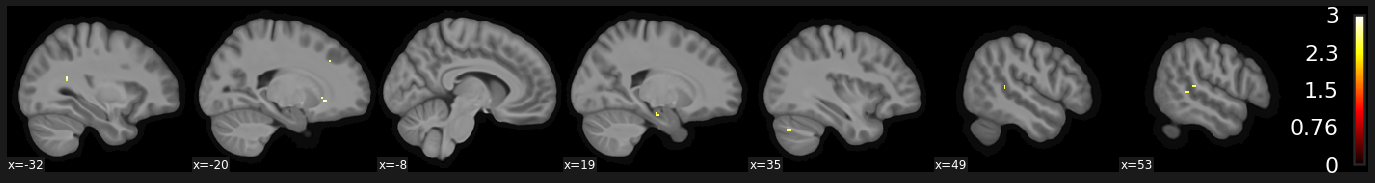

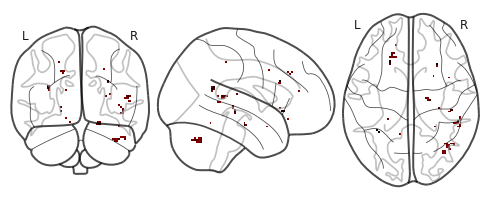

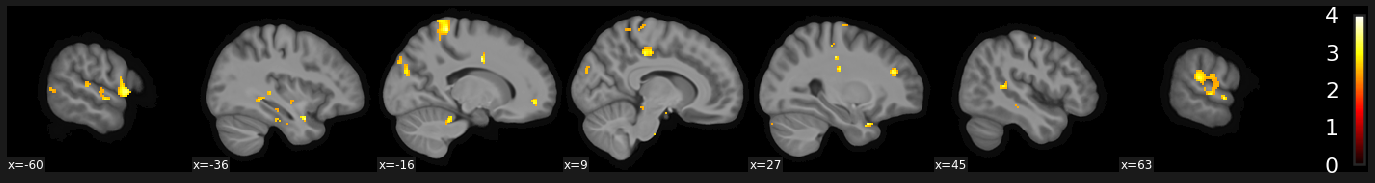

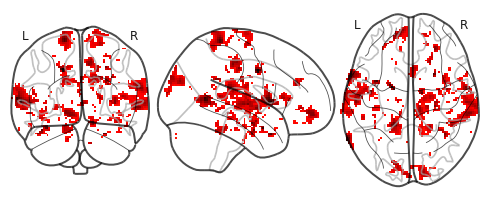

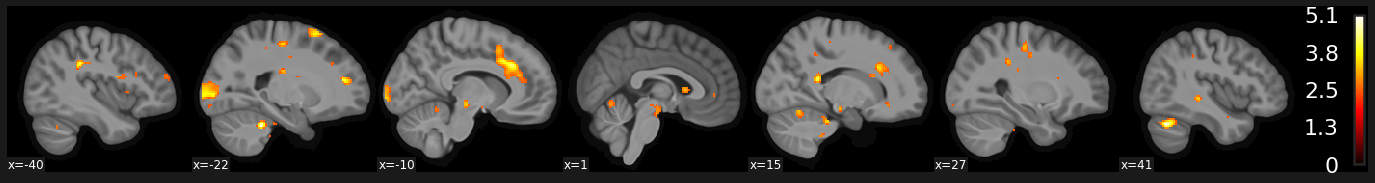

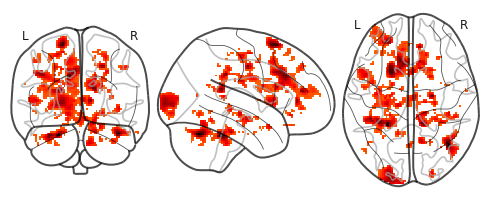

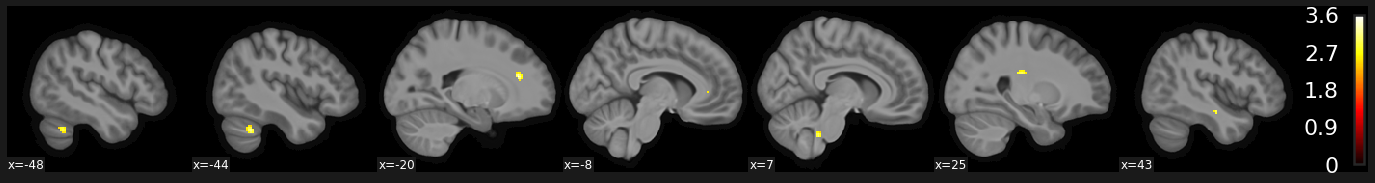

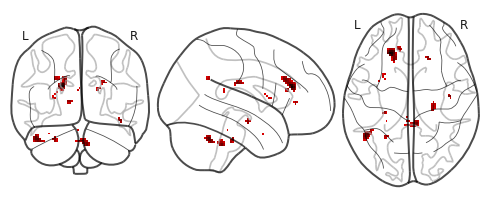

In [21]:
# voxel-wise p threshold
voxel_threshold = 0.01
con_ids = ['0010', '0011', '0012', '0013']

for con_id in con_ids:

    spm_thr = spm.Threshold(contrast_index=1,
                            spm_mat_file = os.path.join(out_root, 'imaging', 'Sink_resp_sv/2ndLevel/_contrast_id_con_%s/SPM.mat' %con_id),
                            stat_image = os.path.join(out_root, 'imaging', 'Sink_resp_sv/2ndLevel/_contrast_id_con_%s/spmT_0001.nii' %con_id),
                            use_topo_fdr=False,
                            use_fwe_correction=False, # here we can use fwe or fdr, default is true
    #                         extent_threshold=10,
                            height_threshold= voxel_threshold, # default is 0.05
    #                         extent_fdr_p_threshold = 0.05,
                            height_threshold_type='p-value', # default is p-value
                            )
    spm_thr.run()

    # plot 
    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/mdm_imaging_analysis/spmT_0001_thr.nii',
                          bg_img = anat_mean,
                           display_mode = 'x')
    
    plotting.plot_glass_brain('/home/rj299/scratch60/mdm_analysis/mdm_imaging_analysis/spmT_0001_thr.nii')
    # plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/mdm_imaging_analysis/spmT_0001_pre_topo_thr.nii')

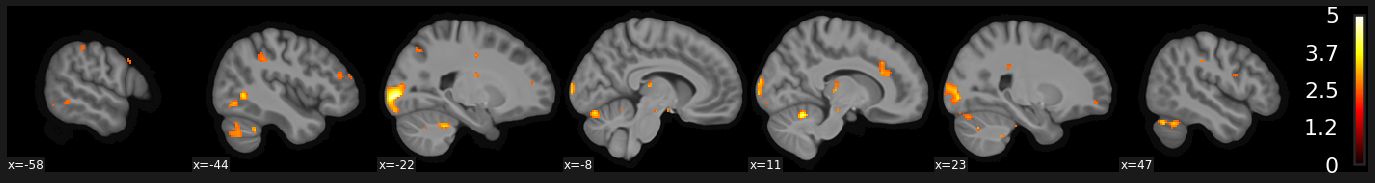

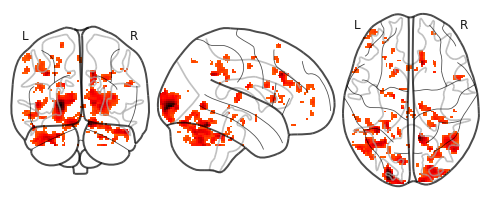

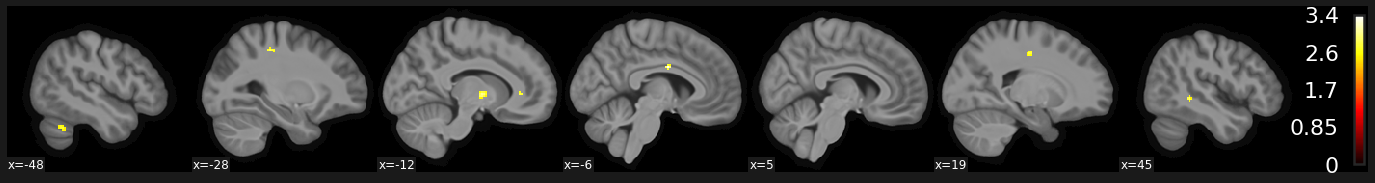

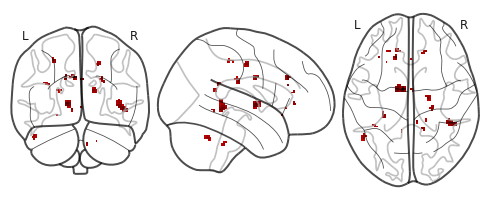

In [20]:
# voxel-wise p threshold
voxel_threshold = 0.01
con_ids = ['0012', '0013']

for con_id in con_ids:

    spm_thr = spm.Threshold(contrast_index=1,
                            spm_mat_file = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv/2ndLevel_heightp05/_contrast_id_con_%s/SPM.mat' %con_id),
                            stat_image = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001.nii' %con_id),
                            use_topo_fdr=False,
                            use_fwe_correction=False, # here we can use fwe or fdr, default is true
    #                         extent_threshold=10,
                            height_threshold= voxel_threshold, # default is 0.05
    #                         extent_fdr_p_threshold = 0.05,
                            height_threshold_type='p-value', # default is p-value
                            )
    spm_thr.run()

    # plot 
    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/mdm_imaging_analysis/spmT_0001_thr.nii',
                          bg_img = anat_mean,
                           display_mode = 'x')
    
    plotting.plot_glass_brain('/home/rj299/scratch60/mdm_analysis/mdm_imaging_analysis/spmT_0001_thr.nii')
    # plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/mdm_imaging_analysis/spmT_0001_pre_topo_thr.nii')

In [22]:
# voxel-wise p threshold
voxel_threshold = 0.05
con_ids = ['0012', '0013']

for con_id in con_ids:

    spm_thr = spm.Threshold(contrast_index=1,
                            spm_mat_file = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv/2ndLevel_heightp05/_contrast_id_con_%s/SPM.mat' %con_id),
                            stat_image = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv/2ndLevel_heightp05/_contrast_id_con_%s/spmT_0001.nii' %con_id),
                            use_topo_fdr=False,
                            use_fwe_correction=False, # here we can use fwe or fdr, default is true
    #                         extent_threshold=10,
                            height_threshold= voxel_threshold, # default is 0.05
    #                         extent_fdr_p_threshold = 0.05,
                            height_threshold_type='p-value', # default is p-value
                            )
    spm_thr.run()

    # find the critical p value for a certain threshold
    t = nib.load('/home/rj299/scratch60/mdm_analysis/mdm_imaging_analysis/spmT_0001_thr.nii')
    t_data = t.get_data()
    t_data_mask = ~np.isnan(t_data)
    t_critical = np.min(t_data[t_data_mask])
    t_critical

    # cluster extent threshold, using the preivous t_critical for initial thresholing
    cluster_thr = fsl.Randomise(in_file = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'mon_sv_glm_con%s_all_sub.nii.gz' %con_id),
                                mask = '/home/rj299/scratch60/mdm_analysis/output/imaging/wb_mask_group.nii.gz',
                                base_name = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'con%s_p05' %con_id),
                                c_thresh = t_critical,
                                one_sample_group_mean = True,
                                tfce = False,
                                vox_p_values = True, 
    #                             raw_stats_imgs = True,
                                num_perm = 5000)
    cluster_thr.run()
    

200112-22:52:56,517 nipype.interface INFO:
	 stdout 2020-01-12T22:52:56.517644:randomise options: -i /home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/mon_sv_glm_con0012_all_sub.nii.gz -o /home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con0012_p05 -c 1.7 -m /home/rj299/scratch60/mdm_analysis/output/imaging/wb_mask_group.nii.gz -n 5000 -1 -x 
200112-22:52:57,487 nipype.interface INFO:
	 stdout 2020-01-12T22:52:57.487471:Loading Data: 
200112-22:52:57,488 nipype.interface INFO:
	 stdout 2020-01-12T22:52:57.488471:Data loaded
200112-22:52:57,706 nipype.interface INFO:
	 stdout 2020-01-12T22:52:57.706692:One-sample design detected; sign-flipping instead of permuting.
200112-22:52:57,709 nipype.interface INFO:
	 stdout 2020-01-12T22:52:57.709317:8.58993e+09 sign-flips required for exhaustive test of t-test 1
200112-22:52:57,715 nipype.interface INFO:
	 stdout 2020-01-12T22:52:57.715771:Doing 5000 random permutations
200112-22:52:57,717 nipype.interface IN

200112-22:53:07,210 nipype.interface INFO:
	 stdout 2020-01-12T22:53:07.210178:Starting permutation 72
200112-22:53:07,343 nipype.interface INFO:
	 stdout 2020-01-12T22:53:07.343048:Starting permutation 73
200112-22:53:07,476 nipype.interface INFO:
	 stdout 2020-01-12T22:53:07.476467:Starting permutation 74
200112-22:53:07,607 nipype.interface INFO:
	 stdout 2020-01-12T22:53:07.607489:Starting permutation 75
200112-22:53:07,738 nipype.interface INFO:
	 stdout 2020-01-12T22:53:07.738348:Starting permutation 76
200112-22:53:07,869 nipype.interface INFO:
	 stdout 2020-01-12T22:53:07.869808:Starting permutation 77
200112-22:53:07,999 nipype.interface INFO:
	 stdout 2020-01-12T22:53:07.999359:Starting permutation 78
200112-22:53:08,128 nipype.interface INFO:
	 stdout 2020-01-12T22:53:08.128658:Starting permutation 79
200112-22:53:08,257 nipype.interface INFO:
	 stdout 2020-01-12T22:53:08.257603:Starting permutation 80
200112-22:53:08,389 nipype.interface INFO:
	 stdout 2020-01-12T22:53:08.3

200112-22:53:17,652 nipype.interface INFO:
	 stdout 2020-01-12T22:53:17.652315:Starting permutation 152
200112-22:53:17,781 nipype.interface INFO:
	 stdout 2020-01-12T22:53:17.781930:Starting permutation 153
200112-22:53:17,911 nipype.interface INFO:
	 stdout 2020-01-12T22:53:17.911807:Starting permutation 154
200112-22:53:18,44 nipype.interface INFO:
	 stdout 2020-01-12T22:53:18.044454:Starting permutation 155
200112-22:53:18,175 nipype.interface INFO:
	 stdout 2020-01-12T22:53:18.175321:Starting permutation 156
200112-22:53:18,309 nipype.interface INFO:
	 stdout 2020-01-12T22:53:18.309894:Starting permutation 157
200112-22:53:18,441 nipype.interface INFO:
	 stdout 2020-01-12T22:53:18.441502:Starting permutation 158
200112-22:53:18,569 nipype.interface INFO:
	 stdout 2020-01-12T22:53:18.569445:Starting permutation 159
200112-22:53:18,703 nipype.interface INFO:
	 stdout 2020-01-12T22:53:18.703484:Starting permutation 160
200112-22:53:18,835 nipype.interface INFO:
	 stdout 2020-01-12T22

200112-22:53:28,44 nipype.interface INFO:
	 stdout 2020-01-12T22:53:28.044529:Starting permutation 231
200112-22:53:28,178 nipype.interface INFO:
	 stdout 2020-01-12T22:53:28.178576:Starting permutation 232
200112-22:53:28,313 nipype.interface INFO:
	 stdout 2020-01-12T22:53:28.313109:Starting permutation 233
200112-22:53:28,444 nipype.interface INFO:
	 stdout 2020-01-12T22:53:28.444513:Starting permutation 234
200112-22:53:28,578 nipype.interface INFO:
	 stdout 2020-01-12T22:53:28.578058:Starting permutation 235
200112-22:53:28,711 nipype.interface INFO:
	 stdout 2020-01-12T22:53:28.711228:Starting permutation 236
200112-22:53:28,842 nipype.interface INFO:
	 stdout 2020-01-12T22:53:28.842340:Starting permutation 237
200112-22:53:28,973 nipype.interface INFO:
	 stdout 2020-01-12T22:53:28.973319:Starting permutation 238
200112-22:53:29,111 nipype.interface INFO:
	 stdout 2020-01-12T22:53:29.111442:Starting permutation 239
200112-22:53:29,251 nipype.interface INFO:
	 stdout 2020-01-12T22

200112-22:53:38,646 nipype.interface INFO:
	 stdout 2020-01-12T22:53:38.646572:Starting permutation 310
200112-22:53:38,779 nipype.interface INFO:
	 stdout 2020-01-12T22:53:38.779432:Starting permutation 311
200112-22:53:38,912 nipype.interface INFO:
	 stdout 2020-01-12T22:53:38.912578:Starting permutation 312
200112-22:53:39,44 nipype.interface INFO:
	 stdout 2020-01-12T22:53:39.044283:Starting permutation 313
200112-22:53:39,171 nipype.interface INFO:
	 stdout 2020-01-12T22:53:39.171370:Starting permutation 314
200112-22:53:39,302 nipype.interface INFO:
	 stdout 2020-01-12T22:53:39.302883:Starting permutation 315
200112-22:53:39,438 nipype.interface INFO:
	 stdout 2020-01-12T22:53:39.438097:Starting permutation 316
200112-22:53:39,570 nipype.interface INFO:
	 stdout 2020-01-12T22:53:39.570514:Starting permutation 317
200112-22:53:39,703 nipype.interface INFO:
	 stdout 2020-01-12T22:53:39.703934:Starting permutation 318
200112-22:53:39,835 nipype.interface INFO:
	 stdout 2020-01-12T22

200112-22:53:49,201 nipype.interface INFO:
	 stdout 2020-01-12T22:53:49.201919:Starting permutation 389
200112-22:53:49,336 nipype.interface INFO:
	 stdout 2020-01-12T22:53:49.336194:Starting permutation 390
200112-22:53:49,465 nipype.interface INFO:
	 stdout 2020-01-12T22:53:49.465853:Starting permutation 391
200112-22:53:49,596 nipype.interface INFO:
	 stdout 2020-01-12T22:53:49.596153:Starting permutation 392
200112-22:53:49,731 nipype.interface INFO:
	 stdout 2020-01-12T22:53:49.731777:Starting permutation 393
200112-22:53:49,864 nipype.interface INFO:
	 stdout 2020-01-12T22:53:49.864339:Starting permutation 394
200112-22:53:49,994 nipype.interface INFO:
	 stdout 2020-01-12T22:53:49.994775:Starting permutation 395
200112-22:53:50,128 nipype.interface INFO:
	 stdout 2020-01-12T22:53:50.128887:Starting permutation 396
200112-22:53:50,262 nipype.interface INFO:
	 stdout 2020-01-12T22:53:50.262517:Starting permutation 397
200112-22:53:50,395 nipype.interface INFO:
	 stdout 2020-01-12T2

200112-22:53:59,475 nipype.interface INFO:
	 stdout 2020-01-12T22:53:59.475013:Starting permutation 468
200112-22:53:59,606 nipype.interface INFO:
	 stdout 2020-01-12T22:53:59.606748:Starting permutation 469
200112-22:53:59,742 nipype.interface INFO:
	 stdout 2020-01-12T22:53:59.742422:Starting permutation 470
200112-22:53:59,870 nipype.interface INFO:
	 stdout 2020-01-12T22:53:59.869949:Starting permutation 471
200112-22:53:59,999 nipype.interface INFO:
	 stdout 2020-01-12T22:53:59.999150:Starting permutation 472
200112-22:54:00,127 nipype.interface INFO:
	 stdout 2020-01-12T22:54:00.127563:Starting permutation 473
200112-22:54:00,256 nipype.interface INFO:
	 stdout 2020-01-12T22:54:00.256540:Starting permutation 474
200112-22:54:00,385 nipype.interface INFO:
	 stdout 2020-01-12T22:54:00.385759:Starting permutation 475
200112-22:54:00,519 nipype.interface INFO:
	 stdout 2020-01-12T22:54:00.519589:Starting permutation 476
200112-22:54:00,650 nipype.interface INFO:
	 stdout 2020-01-12T2

200112-22:54:09,720 nipype.interface INFO:
	 stdout 2020-01-12T22:54:09.720697:Starting permutation 547
200112-22:54:09,856 nipype.interface INFO:
	 stdout 2020-01-12T22:54:09.856525:Starting permutation 548
200112-22:54:09,985 nipype.interface INFO:
	 stdout 2020-01-12T22:54:09.985633:Starting permutation 549
200112-22:54:10,116 nipype.interface INFO:
	 stdout 2020-01-12T22:54:10.116907:Starting permutation 550
200112-22:54:10,247 nipype.interface INFO:
	 stdout 2020-01-12T22:54:10.247312:Starting permutation 551
200112-22:54:10,376 nipype.interface INFO:
	 stdout 2020-01-12T22:54:10.375950:Starting permutation 552
200112-22:54:10,508 nipype.interface INFO:
	 stdout 2020-01-12T22:54:10.508478:Starting permutation 553
200112-22:54:10,637 nipype.interface INFO:
	 stdout 2020-01-12T22:54:10.637131:Starting permutation 554
200112-22:54:10,766 nipype.interface INFO:
	 stdout 2020-01-12T22:54:10.766646:Starting permutation 555
200112-22:54:10,899 nipype.interface INFO:
	 stdout 2020-01-12T2

200112-22:54:20,153 nipype.interface INFO:
	 stdout 2020-01-12T22:54:20.153676:Starting permutation 626
200112-22:54:20,285 nipype.interface INFO:
	 stdout 2020-01-12T22:54:20.285028:Starting permutation 627
200112-22:54:20,414 nipype.interface INFO:
	 stdout 2020-01-12T22:54:20.414583:Starting permutation 628
200112-22:54:20,548 nipype.interface INFO:
	 stdout 2020-01-12T22:54:20.548482:Starting permutation 629
200112-22:54:20,678 nipype.interface INFO:
	 stdout 2020-01-12T22:54:20.677984:Starting permutation 630
200112-22:54:20,809 nipype.interface INFO:
	 stdout 2020-01-12T22:54:20.809808:Starting permutation 631
200112-22:54:20,940 nipype.interface INFO:
	 stdout 2020-01-12T22:54:20.940854:Starting permutation 632
200112-22:54:21,75 nipype.interface INFO:
	 stdout 2020-01-12T22:54:21.075131:Starting permutation 633
200112-22:54:21,208 nipype.interface INFO:
	 stdout 2020-01-12T22:54:21.208475:Starting permutation 634
200112-22:54:21,339 nipype.interface INFO:
	 stdout 2020-01-12T22

200112-22:54:30,514 nipype.interface INFO:
	 stdout 2020-01-12T22:54:30.514928:Starting permutation 705
200112-22:54:30,645 nipype.interface INFO:
	 stdout 2020-01-12T22:54:30.645778:Starting permutation 706
200112-22:54:30,780 nipype.interface INFO:
	 stdout 2020-01-12T22:54:30.780472:Starting permutation 707
200112-22:54:30,914 nipype.interface INFO:
	 stdout 2020-01-12T22:54:30.914658:Starting permutation 708
200112-22:54:31,45 nipype.interface INFO:
	 stdout 2020-01-12T22:54:31.045775:Starting permutation 709
200112-22:54:31,183 nipype.interface INFO:
	 stdout 2020-01-12T22:54:31.183552:Starting permutation 710
200112-22:54:31,312 nipype.interface INFO:
	 stdout 2020-01-12T22:54:31.312701:Starting permutation 711
200112-22:54:31,444 nipype.interface INFO:
	 stdout 2020-01-12T22:54:31.444934:Starting permutation 712
200112-22:54:31,574 nipype.interface INFO:
	 stdout 2020-01-12T22:54:31.573971:Starting permutation 713
200112-22:54:31,704 nipype.interface INFO:
	 stdout 2020-01-12T22

200112-22:54:40,926 nipype.interface INFO:
	 stdout 2020-01-12T22:54:40.926816:Starting permutation 784
200112-22:54:41,59 nipype.interface INFO:
	 stdout 2020-01-12T22:54:41.059545:Starting permutation 785
200112-22:54:41,192 nipype.interface INFO:
	 stdout 2020-01-12T22:54:41.191999:Starting permutation 786
200112-22:54:41,325 nipype.interface INFO:
	 stdout 2020-01-12T22:54:41.325721:Starting permutation 787
200112-22:54:41,457 nipype.interface INFO:
	 stdout 2020-01-12T22:54:41.457233:Starting permutation 788
200112-22:54:41,601 nipype.interface INFO:
	 stdout 2020-01-12T22:54:41.601031:Starting permutation 789
200112-22:54:41,741 nipype.interface INFO:
	 stdout 2020-01-12T22:54:41.741280:Starting permutation 790
200112-22:54:41,873 nipype.interface INFO:
	 stdout 2020-01-12T22:54:41.873247:Starting permutation 791
200112-22:54:42,8 nipype.interface INFO:
	 stdout 2020-01-12T22:54:42.008772:Starting permutation 792
200112-22:54:42,143 nipype.interface INFO:
	 stdout 2020-01-12T22:5

200112-22:54:51,416 nipype.interface INFO:
	 stdout 2020-01-12T22:54:51.416549:Starting permutation 863
200112-22:54:51,546 nipype.interface INFO:
	 stdout 2020-01-12T22:54:51.546797:Starting permutation 864
200112-22:54:51,681 nipype.interface INFO:
	 stdout 2020-01-12T22:54:51.681558:Starting permutation 865
200112-22:54:51,815 nipype.interface INFO:
	 stdout 2020-01-12T22:54:51.815024:Starting permutation 866
200112-22:54:51,954 nipype.interface INFO:
	 stdout 2020-01-12T22:54:51.954559:Starting permutation 867
200112-22:54:52,89 nipype.interface INFO:
	 stdout 2020-01-12T22:54:52.089008:Starting permutation 868
200112-22:54:52,221 nipype.interface INFO:
	 stdout 2020-01-12T22:54:52.221430:Starting permutation 869
200112-22:54:52,356 nipype.interface INFO:
	 stdout 2020-01-12T22:54:52.356138:Starting permutation 870
200112-22:54:52,485 nipype.interface INFO:
	 stdout 2020-01-12T22:54:52.485853:Starting permutation 871
200112-22:54:52,617 nipype.interface INFO:
	 stdout 2020-01-12T22

200112-22:55:01,928 nipype.interface INFO:
	 stdout 2020-01-12T22:55:01.927941:Starting permutation 942
200112-22:55:02,58 nipype.interface INFO:
	 stdout 2020-01-12T22:55:02.058013:Starting permutation 943
200112-22:55:02,188 nipype.interface INFO:
	 stdout 2020-01-12T22:55:02.188507:Starting permutation 944
200112-22:55:02,317 nipype.interface INFO:
	 stdout 2020-01-12T22:55:02.316986:Starting permutation 945
200112-22:55:02,452 nipype.interface INFO:
	 stdout 2020-01-12T22:55:02.452307:Starting permutation 946
200112-22:55:02,581 nipype.interface INFO:
	 stdout 2020-01-12T22:55:02.581643:Starting permutation 947
200112-22:55:02,712 nipype.interface INFO:
	 stdout 2020-01-12T22:55:02.712794:Starting permutation 948
200112-22:55:02,843 nipype.interface INFO:
	 stdout 2020-01-12T22:55:02.843054:Starting permutation 949
200112-22:55:02,975 nipype.interface INFO:
	 stdout 2020-01-12T22:55:02.974957:Starting permutation 950
200112-22:55:03,106 nipype.interface INFO:
	 stdout 2020-01-12T22

200112-22:55:12,209 nipype.interface INFO:
	 stdout 2020-01-12T22:55:12.209772:Starting permutation 1021
200112-22:55:12,337 nipype.interface INFO:
	 stdout 2020-01-12T22:55:12.337792:Starting permutation 1022
200112-22:55:12,466 nipype.interface INFO:
	 stdout 2020-01-12T22:55:12.466456:Starting permutation 1023
200112-22:55:12,594 nipype.interface INFO:
	 stdout 2020-01-12T22:55:12.594482:Starting permutation 1024
200112-22:55:12,724 nipype.interface INFO:
	 stdout 2020-01-12T22:55:12.724771:Starting permutation 1025
200112-22:55:12,855 nipype.interface INFO:
	 stdout 2020-01-12T22:55:12.855648:Starting permutation 1026
200112-22:55:12,984 nipype.interface INFO:
	 stdout 2020-01-12T22:55:12.984715:Starting permutation 1027
200112-22:55:13,119 nipype.interface INFO:
	 stdout 2020-01-12T22:55:13.119899:Starting permutation 1028
200112-22:55:13,249 nipype.interface INFO:
	 stdout 2020-01-12T22:55:13.249145:Starting permutation 1029
200112-22:55:13,381 nipype.interface INFO:
	 stdout 202

200112-22:55:22,466 nipype.interface INFO:
	 stdout 2020-01-12T22:55:22.466025:Starting permutation 1100
200112-22:55:22,593 nipype.interface INFO:
	 stdout 2020-01-12T22:55:22.593823:Starting permutation 1101
200112-22:55:22,724 nipype.interface INFO:
	 stdout 2020-01-12T22:55:22.724853:Starting permutation 1102
200112-22:55:22,855 nipype.interface INFO:
	 stdout 2020-01-12T22:55:22.855208:Starting permutation 1103
200112-22:55:22,986 nipype.interface INFO:
	 stdout 2020-01-12T22:55:22.986783:Starting permutation 1104
200112-22:55:23,112 nipype.interface INFO:
	 stdout 2020-01-12T22:55:23.112734:Starting permutation 1105
200112-22:55:23,238 nipype.interface INFO:
	 stdout 2020-01-12T22:55:23.238613:Starting permutation 1106
200112-22:55:23,367 nipype.interface INFO:
	 stdout 2020-01-12T22:55:23.367781:Starting permutation 1107
200112-22:55:23,495 nipype.interface INFO:
	 stdout 2020-01-12T22:55:23.495011:Starting permutation 1108
200112-22:55:23,628 nipype.interface INFO:
	 stdout 202

200112-22:55:32,713 nipype.interface INFO:
	 stdout 2020-01-12T22:55:32.713271:Starting permutation 1179
200112-22:55:32,852 nipype.interface INFO:
	 stdout 2020-01-12T22:55:32.852578:Starting permutation 1180
200112-22:55:32,982 nipype.interface INFO:
	 stdout 2020-01-12T22:55:32.981941:Starting permutation 1181
200112-22:55:33,107 nipype.interface INFO:
	 stdout 2020-01-12T22:55:33.107029:Starting permutation 1182
200112-22:55:33,235 nipype.interface INFO:
	 stdout 2020-01-12T22:55:33.235164:Starting permutation 1183
200112-22:55:33,364 nipype.interface INFO:
	 stdout 2020-01-12T22:55:33.364386:Starting permutation 1184
200112-22:55:33,493 nipype.interface INFO:
	 stdout 2020-01-12T22:55:33.493903:Starting permutation 1185
200112-22:55:33,627 nipype.interface INFO:
	 stdout 2020-01-12T22:55:33.627342:Starting permutation 1186
200112-22:55:33,764 nipype.interface INFO:
	 stdout 2020-01-12T22:55:33.764162:Starting permutation 1187
200112-22:55:33,893 nipype.interface INFO:
	 stdout 202

200112-22:55:43,39 nipype.interface INFO:
	 stdout 2020-01-12T22:55:43.039871:Starting permutation 1258
200112-22:55:43,167 nipype.interface INFO:
	 stdout 2020-01-12T22:55:43.167628:Starting permutation 1259
200112-22:55:43,302 nipype.interface INFO:
	 stdout 2020-01-12T22:55:43.302706:Starting permutation 1260
200112-22:55:43,432 nipype.interface INFO:
	 stdout 2020-01-12T22:55:43.432136:Starting permutation 1261
200112-22:55:43,567 nipype.interface INFO:
	 stdout 2020-01-12T22:55:43.567586:Starting permutation 1262
200112-22:55:43,697 nipype.interface INFO:
	 stdout 2020-01-12T22:55:43.697850:Starting permutation 1263
200112-22:55:43,827 nipype.interface INFO:
	 stdout 2020-01-12T22:55:43.827933:Starting permutation 1264
200112-22:55:43,957 nipype.interface INFO:
	 stdout 2020-01-12T22:55:43.957560:Starting permutation 1265
200112-22:55:44,87 nipype.interface INFO:
	 stdout 2020-01-12T22:55:44.087314:Starting permutation 1266
200112-22:55:44,216 nipype.interface INFO:
	 stdout 2020-

200112-22:55:53,326 nipype.interface INFO:
	 stdout 2020-01-12T22:55:53.326125:Starting permutation 1337
200112-22:55:53,455 nipype.interface INFO:
	 stdout 2020-01-12T22:55:53.455766:Starting permutation 1338
200112-22:55:53,603 nipype.interface INFO:
	 stdout 2020-01-12T22:55:53.603433:Starting permutation 1339
200112-22:55:53,734 nipype.interface INFO:
	 stdout 2020-01-12T22:55:53.734262:Starting permutation 1340
200112-22:55:53,861 nipype.interface INFO:
	 stdout 2020-01-12T22:55:53.861894:Starting permutation 1341
200112-22:55:54,0 nipype.interface INFO:
	 stdout 2020-01-12T22:55:54.000190:Starting permutation 1342
200112-22:55:54,133 nipype.interface INFO:
	 stdout 2020-01-12T22:55:54.132945:Starting permutation 1343
200112-22:55:54,263 nipype.interface INFO:
	 stdout 2020-01-12T22:55:54.263246:Starting permutation 1344
200112-22:55:54,392 nipype.interface INFO:
	 stdout 2020-01-12T22:55:54.392430:Starting permutation 1345
200112-22:55:54,523 nipype.interface INFO:
	 stdout 2020-

200112-22:56:03,639 nipype.interface INFO:
	 stdout 2020-01-12T22:56:03.639424:Starting permutation 1416
200112-22:56:03,771 nipype.interface INFO:
	 stdout 2020-01-12T22:56:03.771619:Starting permutation 1417
200112-22:56:03,900 nipype.interface INFO:
	 stdout 2020-01-12T22:56:03.900424:Starting permutation 1418
200112-22:56:04,31 nipype.interface INFO:
	 stdout 2020-01-12T22:56:04.031515:Starting permutation 1419
200112-22:56:04,161 nipype.interface INFO:
	 stdout 2020-01-12T22:56:04.161198:Starting permutation 1420
200112-22:56:04,289 nipype.interface INFO:
	 stdout 2020-01-12T22:56:04.289095:Starting permutation 1421
200112-22:56:04,416 nipype.interface INFO:
	 stdout 2020-01-12T22:56:04.416781:Starting permutation 1422
200112-22:56:04,545 nipype.interface INFO:
	 stdout 2020-01-12T22:56:04.545906:Starting permutation 1423
200112-22:56:04,675 nipype.interface INFO:
	 stdout 2020-01-12T22:56:04.675652:Starting permutation 1424
200112-22:56:04,805 nipype.interface INFO:
	 stdout 2020

200112-22:56:13,888 nipype.interface INFO:
	 stdout 2020-01-12T22:56:13.888074:Starting permutation 1495
200112-22:56:14,22 nipype.interface INFO:
	 stdout 2020-01-12T22:56:14.022020:Starting permutation 1496
200112-22:56:14,142 nipype.interface INFO:
	 stdout 2020-01-12T22:56:14.142283:Starting permutation 1497
200112-22:56:14,264 nipype.interface INFO:
	 stdout 2020-01-12T22:56:14.264904:Starting permutation 1498
200112-22:56:14,392 nipype.interface INFO:
	 stdout 2020-01-12T22:56:14.392536:Starting permutation 1499
200112-22:56:14,525 nipype.interface INFO:
	 stdout 2020-01-12T22:56:14.525575:Starting permutation 1500
200112-22:56:14,657 nipype.interface INFO:
	 stdout 2020-01-12T22:56:14.657080:Starting permutation 1501
200112-22:56:14,786 nipype.interface INFO:
	 stdout 2020-01-12T22:56:14.785969:Starting permutation 1502
200112-22:56:14,913 nipype.interface INFO:
	 stdout 2020-01-12T22:56:14.913523:Starting permutation 1503
200112-22:56:15,41 nipype.interface INFO:
	 stdout 2020-

200112-22:56:24,104 nipype.interface INFO:
	 stdout 2020-01-12T22:56:24.104914:Starting permutation 1574
200112-22:56:24,234 nipype.interface INFO:
	 stdout 2020-01-12T22:56:24.234687:Starting permutation 1575
200112-22:56:24,364 nipype.interface INFO:
	 stdout 2020-01-12T22:56:24.364807:Starting permutation 1576
200112-22:56:24,497 nipype.interface INFO:
	 stdout 2020-01-12T22:56:24.497212:Starting permutation 1577
200112-22:56:24,628 nipype.interface INFO:
	 stdout 2020-01-12T22:56:24.628750:Starting permutation 1578
200112-22:56:24,759 nipype.interface INFO:
	 stdout 2020-01-12T22:56:24.759903:Starting permutation 1579
200112-22:56:24,890 nipype.interface INFO:
	 stdout 2020-01-12T22:56:24.890072:Starting permutation 1580
200112-22:56:25,21 nipype.interface INFO:
	 stdout 2020-01-12T22:56:25.021321:Starting permutation 1581
200112-22:56:25,150 nipype.interface INFO:
	 stdout 2020-01-12T22:56:25.150296:Starting permutation 1582
200112-22:56:25,276 nipype.interface INFO:
	 stdout 2020

200112-22:56:34,420 nipype.interface INFO:
	 stdout 2020-01-12T22:56:34.420408:Starting permutation 1653
200112-22:56:34,549 nipype.interface INFO:
	 stdout 2020-01-12T22:56:34.549566:Starting permutation 1654
200112-22:56:34,679 nipype.interface INFO:
	 stdout 2020-01-12T22:56:34.679415:Starting permutation 1655
200112-22:56:34,809 nipype.interface INFO:
	 stdout 2020-01-12T22:56:34.809288:Starting permutation 1656
200112-22:56:34,937 nipype.interface INFO:
	 stdout 2020-01-12T22:56:34.937895:Starting permutation 1657
200112-22:56:35,69 nipype.interface INFO:
	 stdout 2020-01-12T22:56:35.069662:Starting permutation 1658
200112-22:56:35,199 nipype.interface INFO:
	 stdout 2020-01-12T22:56:35.199530:Starting permutation 1659
200112-22:56:35,334 nipype.interface INFO:
	 stdout 2020-01-12T22:56:35.333952:Starting permutation 1660
200112-22:56:35,463 nipype.interface INFO:
	 stdout 2020-01-12T22:56:35.463308:Starting permutation 1661
200112-22:56:35,593 nipype.interface INFO:
	 stdout 2020

200112-22:56:44,718 nipype.interface INFO:
	 stdout 2020-01-12T22:56:44.718180:Starting permutation 1732
200112-22:56:44,846 nipype.interface INFO:
	 stdout 2020-01-12T22:56:44.846566:Starting permutation 1733
200112-22:56:44,978 nipype.interface INFO:
	 stdout 2020-01-12T22:56:44.978713:Starting permutation 1734
200112-22:56:45,106 nipype.interface INFO:
	 stdout 2020-01-12T22:56:45.106920:Starting permutation 1735
200112-22:56:45,228 nipype.interface INFO:
	 stdout 2020-01-12T22:56:45.228211:Starting permutation 1736
200112-22:56:45,355 nipype.interface INFO:
	 stdout 2020-01-12T22:56:45.355114:Starting permutation 1737
200112-22:56:45,483 nipype.interface INFO:
	 stdout 2020-01-12T22:56:45.483586:Starting permutation 1738
200112-22:56:45,610 nipype.interface INFO:
	 stdout 2020-01-12T22:56:45.610788:Starting permutation 1739
200112-22:56:45,738 nipype.interface INFO:
	 stdout 2020-01-12T22:56:45.738772:Starting permutation 1740
200112-22:56:45,866 nipype.interface INFO:
	 stdout 202

200112-22:56:55,37 nipype.interface INFO:
	 stdout 2020-01-12T22:56:55.037031:Starting permutation 1811
200112-22:56:55,165 nipype.interface INFO:
	 stdout 2020-01-12T22:56:55.165753:Starting permutation 1812
200112-22:56:55,301 nipype.interface INFO:
	 stdout 2020-01-12T22:56:55.300956:Starting permutation 1813
200112-22:56:55,432 nipype.interface INFO:
	 stdout 2020-01-12T22:56:55.432853:Starting permutation 1814
200112-22:56:55,563 nipype.interface INFO:
	 stdout 2020-01-12T22:56:55.563676:Starting permutation 1815
200112-22:56:55,693 nipype.interface INFO:
	 stdout 2020-01-12T22:56:55.693233:Starting permutation 1816
200112-22:56:55,831 nipype.interface INFO:
	 stdout 2020-01-12T22:56:55.831556:Starting permutation 1817
200112-22:56:55,962 nipype.interface INFO:
	 stdout 2020-01-12T22:56:55.962564:Starting permutation 1818
200112-22:56:56,93 nipype.interface INFO:
	 stdout 2020-01-12T22:56:56.093444:Starting permutation 1819
200112-22:56:56,225 nipype.interface INFO:
	 stdout 2020-

200112-22:57:05,691 nipype.interface INFO:
	 stdout 2020-01-12T22:57:05.691692:Starting permutation 1890
200112-22:57:05,823 nipype.interface INFO:
	 stdout 2020-01-12T22:57:05.822959:Starting permutation 1891
200112-22:57:05,954 nipype.interface INFO:
	 stdout 2020-01-12T22:57:05.954290:Starting permutation 1892
200112-22:57:06,83 nipype.interface INFO:
	 stdout 2020-01-12T22:57:06.083892:Starting permutation 1893
200112-22:57:06,213 nipype.interface INFO:
	 stdout 2020-01-12T22:57:06.213070:Starting permutation 1894
200112-22:57:06,345 nipype.interface INFO:
	 stdout 2020-01-12T22:57:06.345885:Starting permutation 1895
200112-22:57:06,477 nipype.interface INFO:
	 stdout 2020-01-12T22:57:06.477902:Starting permutation 1896
200112-22:57:06,607 nipype.interface INFO:
	 stdout 2020-01-12T22:57:06.607375:Starting permutation 1897
200112-22:57:06,736 nipype.interface INFO:
	 stdout 2020-01-12T22:57:06.736932:Starting permutation 1898
200112-22:57:06,869 nipype.interface INFO:
	 stdout 2020

200112-22:57:15,948 nipype.interface INFO:
	 stdout 2020-01-12T22:57:15.948541:Starting permutation 1969
200112-22:57:16,66 nipype.interface INFO:
	 stdout 2020-01-12T22:57:16.066746:Starting permutation 1970
200112-22:57:16,183 nipype.interface INFO:
	 stdout 2020-01-12T22:57:16.183655:Starting permutation 1971
200112-22:57:16,300 nipype.interface INFO:
	 stdout 2020-01-12T22:57:16.300608:Starting permutation 1972
200112-22:57:16,418 nipype.interface INFO:
	 stdout 2020-01-12T22:57:16.418809:Starting permutation 1973
200112-22:57:16,539 nipype.interface INFO:
	 stdout 2020-01-12T22:57:16.539256:Starting permutation 1974
200112-22:57:16,658 nipype.interface INFO:
	 stdout 2020-01-12T22:57:16.658719:Starting permutation 1975
200112-22:57:16,778 nipype.interface INFO:
	 stdout 2020-01-12T22:57:16.778245:Starting permutation 1976
200112-22:57:16,906 nipype.interface INFO:
	 stdout 2020-01-12T22:57:16.906742:Starting permutation 1977
200112-22:57:17,34 nipype.interface INFO:
	 stdout 2020-

200112-22:57:26,86 nipype.interface INFO:
	 stdout 2020-01-12T22:57:26.086533:Starting permutation 2048
200112-22:57:26,216 nipype.interface INFO:
	 stdout 2020-01-12T22:57:26.216844:Starting permutation 2049
200112-22:57:26,346 nipype.interface INFO:
	 stdout 2020-01-12T22:57:26.345942:Starting permutation 2050
200112-22:57:26,475 nipype.interface INFO:
	 stdout 2020-01-12T22:57:26.475741:Starting permutation 2051
200112-22:57:26,604 nipype.interface INFO:
	 stdout 2020-01-12T22:57:26.604717:Starting permutation 2052
200112-22:57:26,734 nipype.interface INFO:
	 stdout 2020-01-12T22:57:26.734555:Starting permutation 2053
200112-22:57:26,864 nipype.interface INFO:
	 stdout 2020-01-12T22:57:26.864177:Starting permutation 2054
200112-22:57:26,992 nipype.interface INFO:
	 stdout 2020-01-12T22:57:26.992005:Starting permutation 2055
200112-22:57:27,122 nipype.interface INFO:
	 stdout 2020-01-12T22:57:27.122561:Starting permutation 2056
200112-22:57:27,251 nipype.interface INFO:
	 stdout 2020

200112-22:57:36,407 nipype.interface INFO:
	 stdout 2020-01-12T22:57:36.407909:Starting permutation 2127
200112-22:57:36,540 nipype.interface INFO:
	 stdout 2020-01-12T22:57:36.540070:Starting permutation 2128
200112-22:57:36,670 nipype.interface INFO:
	 stdout 2020-01-12T22:57:36.670487:Starting permutation 2129
200112-22:57:36,802 nipype.interface INFO:
	 stdout 2020-01-12T22:57:36.802106:Starting permutation 2130
200112-22:57:36,933 nipype.interface INFO:
	 stdout 2020-01-12T22:57:36.933299:Starting permutation 2131
200112-22:57:37,60 nipype.interface INFO:
	 stdout 2020-01-12T22:57:37.060892:Starting permutation 2132
200112-22:57:37,191 nipype.interface INFO:
	 stdout 2020-01-12T22:57:37.191075:Starting permutation 2133
200112-22:57:37,317 nipype.interface INFO:
	 stdout 2020-01-12T22:57:37.317503:Starting permutation 2134
200112-22:57:37,446 nipype.interface INFO:
	 stdout 2020-01-12T22:57:37.446906:Starting permutation 2135
200112-22:57:37,574 nipype.interface INFO:
	 stdout 2020

200112-22:57:46,693 nipype.interface INFO:
	 stdout 2020-01-12T22:57:46.693693:Starting permutation 2206
200112-22:57:46,833 nipype.interface INFO:
	 stdout 2020-01-12T22:57:46.833615:Starting permutation 2207
200112-22:57:46,966 nipype.interface INFO:
	 stdout 2020-01-12T22:57:46.966441:Starting permutation 2208
200112-22:57:47,97 nipype.interface INFO:
	 stdout 2020-01-12T22:57:47.097109:Starting permutation 2209
200112-22:57:47,227 nipype.interface INFO:
	 stdout 2020-01-12T22:57:47.227260:Starting permutation 2210
200112-22:57:47,360 nipype.interface INFO:
	 stdout 2020-01-12T22:57:47.360225:Starting permutation 2211
200112-22:57:47,488 nipype.interface INFO:
	 stdout 2020-01-12T22:57:47.488792:Starting permutation 2212
200112-22:57:47,607 nipype.interface INFO:
	 stdout 2020-01-12T22:57:47.607930:Starting permutation 2213
200112-22:57:47,726 nipype.interface INFO:
	 stdout 2020-01-12T22:57:47.726608:Starting permutation 2214
200112-22:57:47,852 nipype.interface INFO:
	 stdout 2020

200112-22:57:57,12 nipype.interface INFO:
	 stdout 2020-01-12T22:57:57.012651:Starting permutation 2285
200112-22:57:57,143 nipype.interface INFO:
	 stdout 2020-01-12T22:57:57.143521:Starting permutation 2286
200112-22:57:57,274 nipype.interface INFO:
	 stdout 2020-01-12T22:57:57.274797:Starting permutation 2287
200112-22:57:57,405 nipype.interface INFO:
	 stdout 2020-01-12T22:57:57.405878:Starting permutation 2288
200112-22:57:57,534 nipype.interface INFO:
	 stdout 2020-01-12T22:57:57.534553:Starting permutation 2289
200112-22:57:57,664 nipype.interface INFO:
	 stdout 2020-01-12T22:57:57.664742:Starting permutation 2290
200112-22:57:57,796 nipype.interface INFO:
	 stdout 2020-01-12T22:57:57.796170:Starting permutation 2291
200112-22:57:57,926 nipype.interface INFO:
	 stdout 2020-01-12T22:57:57.926720:Starting permutation 2292
200112-22:57:58,57 nipype.interface INFO:
	 stdout 2020-01-12T22:57:58.057914:Starting permutation 2293
200112-22:57:58,192 nipype.interface INFO:
	 stdout 2020-

200112-22:58:07,458 nipype.interface INFO:
	 stdout 2020-01-12T22:58:07.458536:Starting permutation 2364
200112-22:58:07,590 nipype.interface INFO:
	 stdout 2020-01-12T22:58:07.590639:Starting permutation 2365
200112-22:58:07,716 nipype.interface INFO:
	 stdout 2020-01-12T22:58:07.716330:Starting permutation 2366
200112-22:58:07,847 nipype.interface INFO:
	 stdout 2020-01-12T22:58:07.846949:Starting permutation 2367
200112-22:58:07,976 nipype.interface INFO:
	 stdout 2020-01-12T22:58:07.976342:Starting permutation 2368
200112-22:58:08,105 nipype.interface INFO:
	 stdout 2020-01-12T22:58:08.105937:Starting permutation 2369
200112-22:58:08,236 nipype.interface INFO:
	 stdout 2020-01-12T22:58:08.236889:Starting permutation 2370
200112-22:58:08,366 nipype.interface INFO:
	 stdout 2020-01-12T22:58:08.366850:Starting permutation 2371
200112-22:58:08,497 nipype.interface INFO:
	 stdout 2020-01-12T22:58:08.497009:Starting permutation 2372
200112-22:58:08,626 nipype.interface INFO:
	 stdout 202

200112-22:58:17,697 nipype.interface INFO:
	 stdout 2020-01-12T22:58:17.697927:Starting permutation 2443
200112-22:58:17,834 nipype.interface INFO:
	 stdout 2020-01-12T22:58:17.834600:Starting permutation 2444
200112-22:58:17,963 nipype.interface INFO:
	 stdout 2020-01-12T22:58:17.963505:Starting permutation 2445
200112-22:58:18,97 nipype.interface INFO:
	 stdout 2020-01-12T22:58:18.097249:Starting permutation 2446
200112-22:58:18,228 nipype.interface INFO:
	 stdout 2020-01-12T22:58:18.228003:Starting permutation 2447
200112-22:58:18,359 nipype.interface INFO:
	 stdout 2020-01-12T22:58:18.359802:Starting permutation 2448
200112-22:58:18,492 nipype.interface INFO:
	 stdout 2020-01-12T22:58:18.492825:Starting permutation 2449
200112-22:58:18,620 nipype.interface INFO:
	 stdout 2020-01-12T22:58:18.620920:Starting permutation 2450
200112-22:58:18,749 nipype.interface INFO:
	 stdout 2020-01-12T22:58:18.749637:Starting permutation 2451
200112-22:58:18,879 nipype.interface INFO:
	 stdout 2020

200112-22:58:27,675 nipype.interface INFO:
	 stdout 2020-01-12T22:58:27.675039:Starting permutation 2522
200112-22:58:27,809 nipype.interface INFO:
	 stdout 2020-01-12T22:58:27.809523:Starting permutation 2523
200112-22:58:27,939 nipype.interface INFO:
	 stdout 2020-01-12T22:58:27.939600:Starting permutation 2524
200112-22:58:28,70 nipype.interface INFO:
	 stdout 2020-01-12T22:58:28.070473:Starting permutation 2525
200112-22:58:28,203 nipype.interface INFO:
	 stdout 2020-01-12T22:58:28.203711:Starting permutation 2526
200112-22:58:28,338 nipype.interface INFO:
	 stdout 2020-01-12T22:58:28.338178:Starting permutation 2527
200112-22:58:28,476 nipype.interface INFO:
	 stdout 2020-01-12T22:58:28.476487:Starting permutation 2528
200112-22:58:28,608 nipype.interface INFO:
	 stdout 2020-01-12T22:58:28.608275:Starting permutation 2529
200112-22:58:28,740 nipype.interface INFO:
	 stdout 2020-01-12T22:58:28.740600:Starting permutation 2530
200112-22:58:28,874 nipype.interface INFO:
	 stdout 2020

200112-22:58:38,85 nipype.interface INFO:
	 stdout 2020-01-12T22:58:38.084942:Starting permutation 2601
200112-22:58:38,226 nipype.interface INFO:
	 stdout 2020-01-12T22:58:38.226312:Starting permutation 2602
200112-22:58:38,362 nipype.interface INFO:
	 stdout 2020-01-12T22:58:38.362400:Starting permutation 2603
200112-22:58:38,501 nipype.interface INFO:
	 stdout 2020-01-12T22:58:38.501119:Starting permutation 2604
200112-22:58:38,637 nipype.interface INFO:
	 stdout 2020-01-12T22:58:38.637610:Starting permutation 2605
200112-22:58:38,775 nipype.interface INFO:
	 stdout 2020-01-12T22:58:38.775350:Starting permutation 2606
200112-22:58:38,911 nipype.interface INFO:
	 stdout 2020-01-12T22:58:38.911139:Starting permutation 2607
200112-22:58:39,44 nipype.interface INFO:
	 stdout 2020-01-12T22:58:39.044626:Starting permutation 2608
200112-22:58:39,173 nipype.interface INFO:
	 stdout 2020-01-12T22:58:39.173581:Starting permutation 2609
200112-22:58:39,306 nipype.interface INFO:
	 stdout 2020-

200112-22:58:48,466 nipype.interface INFO:
	 stdout 2020-01-12T22:58:48.465953:Starting permutation 2680
200112-22:58:48,594 nipype.interface INFO:
	 stdout 2020-01-12T22:58:48.594332:Starting permutation 2681
200112-22:58:48,723 nipype.interface INFO:
	 stdout 2020-01-12T22:58:48.723036:Starting permutation 2682
200112-22:58:48,857 nipype.interface INFO:
	 stdout 2020-01-12T22:58:48.857198:Starting permutation 2683
200112-22:58:48,985 nipype.interface INFO:
	 stdout 2020-01-12T22:58:48.985253:Starting permutation 2684
200112-22:58:49,115 nipype.interface INFO:
	 stdout 2020-01-12T22:58:49.115116:Starting permutation 2685
200112-22:58:49,248 nipype.interface INFO:
	 stdout 2020-01-12T22:58:49.248356:Starting permutation 2686
200112-22:58:49,378 nipype.interface INFO:
	 stdout 2020-01-12T22:58:49.378258:Starting permutation 2687
200112-22:58:49,508 nipype.interface INFO:
	 stdout 2020-01-12T22:58:49.508598:Starting permutation 2688
200112-22:58:49,639 nipype.interface INFO:
	 stdout 202

200112-22:58:58,992 nipype.interface INFO:
	 stdout 2020-01-12T22:58:58.992279:Starting permutation 2759
200112-22:58:59,121 nipype.interface INFO:
	 stdout 2020-01-12T22:58:59.121156:Starting permutation 2760
200112-22:58:59,254 nipype.interface INFO:
	 stdout 2020-01-12T22:58:59.254518:Starting permutation 2761
200112-22:58:59,383 nipype.interface INFO:
	 stdout 2020-01-12T22:58:59.383207:Starting permutation 2762
200112-22:58:59,517 nipype.interface INFO:
	 stdout 2020-01-12T22:58:59.517406:Starting permutation 2763
200112-22:58:59,645 nipype.interface INFO:
	 stdout 2020-01-12T22:58:59.645600:Starting permutation 2764
200112-22:58:59,780 nipype.interface INFO:
	 stdout 2020-01-12T22:58:59.780549:Starting permutation 2765
200112-22:58:59,915 nipype.interface INFO:
	 stdout 2020-01-12T22:58:59.915388:Starting permutation 2766
200112-22:59:00,50 nipype.interface INFO:
	 stdout 2020-01-12T22:59:00.050316:Starting permutation 2767
200112-22:59:00,187 nipype.interface INFO:
	 stdout 2020

200112-22:59:09,483 nipype.interface INFO:
	 stdout 2020-01-12T22:59:09.483098:Starting permutation 2838
200112-22:59:09,614 nipype.interface INFO:
	 stdout 2020-01-12T22:59:09.614332:Starting permutation 2839
200112-22:59:09,745 nipype.interface INFO:
	 stdout 2020-01-12T22:59:09.745721:Starting permutation 2840
200112-22:59:09,877 nipype.interface INFO:
	 stdout 2020-01-12T22:59:09.877328:Starting permutation 2841
200112-22:59:10,11 nipype.interface INFO:
	 stdout 2020-01-12T22:59:10.011097:Starting permutation 2842
200112-22:59:10,140 nipype.interface INFO:
	 stdout 2020-01-12T22:59:10.140047:Starting permutation 2843
200112-22:59:10,271 nipype.interface INFO:
	 stdout 2020-01-12T22:59:10.271517:Starting permutation 2844
200112-22:59:10,403 nipype.interface INFO:
	 stdout 2020-01-12T22:59:10.403486:Starting permutation 2845
200112-22:59:10,536 nipype.interface INFO:
	 stdout 2020-01-12T22:59:10.536090:Starting permutation 2846
200112-22:59:10,665 nipype.interface INFO:
	 stdout 2020

200112-22:59:19,903 nipype.interface INFO:
	 stdout 2020-01-12T22:59:19.903253:Starting permutation 2917
200112-22:59:20,35 nipype.interface INFO:
	 stdout 2020-01-12T22:59:20.034967:Starting permutation 2918
200112-22:59:20,159 nipype.interface INFO:
	 stdout 2020-01-12T22:59:20.159943:Starting permutation 2919
200112-22:59:20,280 nipype.interface INFO:
	 stdout 2020-01-12T22:59:20.280754:Starting permutation 2920
200112-22:59:20,403 nipype.interface INFO:
	 stdout 2020-01-12T22:59:20.403353:Starting permutation 2921
200112-22:59:20,530 nipype.interface INFO:
	 stdout 2020-01-12T22:59:20.530276:Starting permutation 2922
200112-22:59:20,662 nipype.interface INFO:
	 stdout 2020-01-12T22:59:20.662934:Starting permutation 2923
200112-22:59:20,794 nipype.interface INFO:
	 stdout 2020-01-12T22:59:20.794207:Starting permutation 2924
200112-22:59:20,928 nipype.interface INFO:
	 stdout 2020-01-12T22:59:20.928796:Starting permutation 2925
200112-22:59:21,61 nipype.interface INFO:
	 stdout 2020-

200112-22:59:30,334 nipype.interface INFO:
	 stdout 2020-01-12T22:59:30.334463:Starting permutation 2996
200112-22:59:30,469 nipype.interface INFO:
	 stdout 2020-01-12T22:59:30.469261:Starting permutation 2997
200112-22:59:30,598 nipype.interface INFO:
	 stdout 2020-01-12T22:59:30.598041:Starting permutation 2998
200112-22:59:30,730 nipype.interface INFO:
	 stdout 2020-01-12T22:59:30.730072:Starting permutation 2999
200112-22:59:30,856 nipype.interface INFO:
	 stdout 2020-01-12T22:59:30.856212:Starting permutation 3000
200112-22:59:30,985 nipype.interface INFO:
	 stdout 2020-01-12T22:59:30.985555:Starting permutation 3001
200112-22:59:31,113 nipype.interface INFO:
	 stdout 2020-01-12T22:59:31.113268:Starting permutation 3002
200112-22:59:31,240 nipype.interface INFO:
	 stdout 2020-01-12T22:59:31.240568:Starting permutation 3003
200112-22:59:31,373 nipype.interface INFO:
	 stdout 2020-01-12T22:59:31.373389:Starting permutation 3004
200112-22:59:31,504 nipype.interface INFO:
	 stdout 202

200112-22:59:40,640 nipype.interface INFO:
	 stdout 2020-01-12T22:59:40.640202:Starting permutation 3075
200112-22:59:40,769 nipype.interface INFO:
	 stdout 2020-01-12T22:59:40.769005:Starting permutation 3076
200112-22:59:40,910 nipype.interface INFO:
	 stdout 2020-01-12T22:59:40.909976:Starting permutation 3077
200112-22:59:41,42 nipype.interface INFO:
	 stdout 2020-01-12T22:59:41.041959:Starting permutation 3078
200112-22:59:41,173 nipype.interface INFO:
	 stdout 2020-01-12T22:59:41.173769:Starting permutation 3079
200112-22:59:41,304 nipype.interface INFO:
	 stdout 2020-01-12T22:59:41.304635:Starting permutation 3080
200112-22:59:41,437 nipype.interface INFO:
	 stdout 2020-01-12T22:59:41.437267:Starting permutation 3081
200112-22:59:41,568 nipype.interface INFO:
	 stdout 2020-01-12T22:59:41.568820:Starting permutation 3082
200112-22:59:41,700 nipype.interface INFO:
	 stdout 2020-01-12T22:59:41.700705:Starting permutation 3083
200112-22:59:41,828 nipype.interface INFO:
	 stdout 2020

200112-22:59:51,51 nipype.interface INFO:
	 stdout 2020-01-12T22:59:51.050987:Starting permutation 3154
200112-22:59:51,185 nipype.interface INFO:
	 stdout 2020-01-12T22:59:51.185069:Starting permutation 3155
200112-22:59:51,314 nipype.interface INFO:
	 stdout 2020-01-12T22:59:51.314887:Starting permutation 3156
200112-22:59:51,446 nipype.interface INFO:
	 stdout 2020-01-12T22:59:51.446642:Starting permutation 3157
200112-22:59:51,575 nipype.interface INFO:
	 stdout 2020-01-12T22:59:51.575151:Starting permutation 3158
200112-22:59:51,709 nipype.interface INFO:
	 stdout 2020-01-12T22:59:51.709633:Starting permutation 3159
200112-22:59:51,840 nipype.interface INFO:
	 stdout 2020-01-12T22:59:51.840681:Starting permutation 3160
200112-22:59:51,973 nipype.interface INFO:
	 stdout 2020-01-12T22:59:51.973304:Starting permutation 3161
200112-22:59:52,104 nipype.interface INFO:
	 stdout 2020-01-12T22:59:52.104736:Starting permutation 3162
200112-22:59:52,236 nipype.interface INFO:
	 stdout 2020

200112-23:00:01,368 nipype.interface INFO:
	 stdout 2020-01-12T23:00:01.368892:Starting permutation 3233
200112-23:00:01,497 nipype.interface INFO:
	 stdout 2020-01-12T23:00:01.497850:Starting permutation 3234
200112-23:00:01,629 nipype.interface INFO:
	 stdout 2020-01-12T23:00:01.629377:Starting permutation 3235
200112-23:00:01,758 nipype.interface INFO:
	 stdout 2020-01-12T23:00:01.757976:Starting permutation 3236
200112-23:00:01,899 nipype.interface INFO:
	 stdout 2020-01-12T23:00:01.899363:Starting permutation 3237
200112-23:00:02,36 nipype.interface INFO:
	 stdout 2020-01-12T23:00:02.036549:Starting permutation 3238
200112-23:00:02,168 nipype.interface INFO:
	 stdout 2020-01-12T23:00:02.168343:Starting permutation 3239
200112-23:00:02,297 nipype.interface INFO:
	 stdout 2020-01-12T23:00:02.297597:Starting permutation 3240
200112-23:00:02,428 nipype.interface INFO:
	 stdout 2020-01-12T23:00:02.428188:Starting permutation 3241
200112-23:00:02,552 nipype.interface INFO:
	 stdout 2020

200112-23:00:11,734 nipype.interface INFO:
	 stdout 2020-01-12T23:00:11.734150:Starting permutation 3312
200112-23:00:11,866 nipype.interface INFO:
	 stdout 2020-01-12T23:00:11.866433:Starting permutation 3313
200112-23:00:11,999 nipype.interface INFO:
	 stdout 2020-01-12T23:00:11.999352:Starting permutation 3314
200112-23:00:12,127 nipype.interface INFO:
	 stdout 2020-01-12T23:00:12.127062:Starting permutation 3315
200112-23:00:12,258 nipype.interface INFO:
	 stdout 2020-01-12T23:00:12.258086:Starting permutation 3316
200112-23:00:12,388 nipype.interface INFO:
	 stdout 2020-01-12T23:00:12.388308:Starting permutation 3317
200112-23:00:12,525 nipype.interface INFO:
	 stdout 2020-01-12T23:00:12.525674:Starting permutation 3318
200112-23:00:12,658 nipype.interface INFO:
	 stdout 2020-01-12T23:00:12.658371:Starting permutation 3319
200112-23:00:12,788 nipype.interface INFO:
	 stdout 2020-01-12T23:00:12.788845:Starting permutation 3320
200112-23:00:12,919 nipype.interface INFO:
	 stdout 202

200112-23:00:22,67 nipype.interface INFO:
	 stdout 2020-01-12T23:00:22.067793:Starting permutation 3391
200112-23:00:22,199 nipype.interface INFO:
	 stdout 2020-01-12T23:00:22.199719:Starting permutation 3392
200112-23:00:22,331 nipype.interface INFO:
	 stdout 2020-01-12T23:00:22.331269:Starting permutation 3393
200112-23:00:22,460 nipype.interface INFO:
	 stdout 2020-01-12T23:00:22.460868:Starting permutation 3394
200112-23:00:22,592 nipype.interface INFO:
	 stdout 2020-01-12T23:00:22.592172:Starting permutation 3395
200112-23:00:22,723 nipype.interface INFO:
	 stdout 2020-01-12T23:00:22.723899:Starting permutation 3396
200112-23:00:22,857 nipype.interface INFO:
	 stdout 2020-01-12T23:00:22.857201:Starting permutation 3397
200112-23:00:22,988 nipype.interface INFO:
	 stdout 2020-01-12T23:00:22.988024:Starting permutation 3398
200112-23:00:23,123 nipype.interface INFO:
	 stdout 2020-01-12T23:00:23.123358:Starting permutation 3399
200112-23:00:23,251 nipype.interface INFO:
	 stdout 2020

200112-23:00:32,496 nipype.interface INFO:
	 stdout 2020-01-12T23:00:32.496925:Starting permutation 3470
200112-23:00:32,634 nipype.interface INFO:
	 stdout 2020-01-12T23:00:32.634055:Starting permutation 3471
200112-23:00:32,763 nipype.interface INFO:
	 stdout 2020-01-12T23:00:32.763001:Starting permutation 3472
200112-23:00:32,893 nipype.interface INFO:
	 stdout 2020-01-12T23:00:32.893410:Starting permutation 3473
200112-23:00:33,24 nipype.interface INFO:
	 stdout 2020-01-12T23:00:33.023949:Starting permutation 3474
200112-23:00:33,157 nipype.interface INFO:
	 stdout 2020-01-12T23:00:33.157370:Starting permutation 3475
200112-23:00:33,288 nipype.interface INFO:
	 stdout 2020-01-12T23:00:33.288674:Starting permutation 3476
200112-23:00:33,419 nipype.interface INFO:
	 stdout 2020-01-12T23:00:33.419595:Starting permutation 3477
200112-23:00:33,550 nipype.interface INFO:
	 stdout 2020-01-12T23:00:33.550621:Starting permutation 3478
200112-23:00:33,685 nipype.interface INFO:
	 stdout 2020

200112-23:00:42,877 nipype.interface INFO:
	 stdout 2020-01-12T23:00:42.877005:Starting permutation 3549
200112-23:00:43,10 nipype.interface INFO:
	 stdout 2020-01-12T23:00:43.010714:Starting permutation 3550
200112-23:00:43,144 nipype.interface INFO:
	 stdout 2020-01-12T23:00:43.144876:Starting permutation 3551
200112-23:00:43,279 nipype.interface INFO:
	 stdout 2020-01-12T23:00:43.278987:Starting permutation 3552
200112-23:00:43,408 nipype.interface INFO:
	 stdout 2020-01-12T23:00:43.408401:Starting permutation 3553
200112-23:00:43,540 nipype.interface INFO:
	 stdout 2020-01-12T23:00:43.540161:Starting permutation 3554
200112-23:00:43,675 nipype.interface INFO:
	 stdout 2020-01-12T23:00:43.675201:Starting permutation 3555
200112-23:00:43,807 nipype.interface INFO:
	 stdout 2020-01-12T23:00:43.807882:Starting permutation 3556
200112-23:00:43,937 nipype.interface INFO:
	 stdout 2020-01-12T23:00:43.937754:Starting permutation 3557
200112-23:00:44,73 nipype.interface INFO:
	 stdout 2020-

200112-23:00:53,259 nipype.interface INFO:
	 stdout 2020-01-12T23:00:53.258992:Starting permutation 3628
200112-23:00:53,389 nipype.interface INFO:
	 stdout 2020-01-12T23:00:53.389630:Starting permutation 3629
200112-23:00:53,518 nipype.interface INFO:
	 stdout 2020-01-12T23:00:53.518229:Starting permutation 3630
200112-23:00:53,659 nipype.interface INFO:
	 stdout 2020-01-12T23:00:53.659783:Starting permutation 3631
200112-23:00:53,790 nipype.interface INFO:
	 stdout 2020-01-12T23:00:53.790477:Starting permutation 3632
200112-23:00:53,923 nipype.interface INFO:
	 stdout 2020-01-12T23:00:53.923903:Starting permutation 3633
200112-23:00:54,56 nipype.interface INFO:
	 stdout 2020-01-12T23:00:54.056093:Starting permutation 3634
200112-23:00:54,185 nipype.interface INFO:
	 stdout 2020-01-12T23:00:54.185636:Starting permutation 3635
200112-23:00:54,313 nipype.interface INFO:
	 stdout 2020-01-12T23:00:54.313817:Starting permutation 3636
200112-23:00:54,445 nipype.interface INFO:
	 stdout 2020

200112-23:01:03,758 nipype.interface INFO:
	 stdout 2020-01-12T23:01:03.758735:Starting permutation 3707
200112-23:01:03,903 nipype.interface INFO:
	 stdout 2020-01-12T23:01:03.903462:Starting permutation 3708
200112-23:01:04,47 nipype.interface INFO:
	 stdout 2020-01-12T23:01:04.047909:Starting permutation 3709
200112-23:01:04,179 nipype.interface INFO:
	 stdout 2020-01-12T23:01:04.179895:Starting permutation 3710
200112-23:01:04,304 nipype.interface INFO:
	 stdout 2020-01-12T23:01:04.304253:Starting permutation 3711
200112-23:01:04,428 nipype.interface INFO:
	 stdout 2020-01-12T23:01:04.428630:Starting permutation 3712
200112-23:01:04,554 nipype.interface INFO:
	 stdout 2020-01-12T23:01:04.554469:Starting permutation 3713
200112-23:01:04,687 nipype.interface INFO:
	 stdout 2020-01-12T23:01:04.687805:Starting permutation 3714
200112-23:01:04,828 nipype.interface INFO:
	 stdout 2020-01-12T23:01:04.828750:Starting permutation 3715
200112-23:01:04,965 nipype.interface INFO:
	 stdout 2020

200112-23:01:14,356 nipype.interface INFO:
	 stdout 2020-01-12T23:01:14.356526:Starting permutation 3786
200112-23:01:14,491 nipype.interface INFO:
	 stdout 2020-01-12T23:01:14.491233:Starting permutation 3787
200112-23:01:14,623 nipype.interface INFO:
	 stdout 2020-01-12T23:01:14.623221:Starting permutation 3788
200112-23:01:14,756 nipype.interface INFO:
	 stdout 2020-01-12T23:01:14.756696:Starting permutation 3789
200112-23:01:14,893 nipype.interface INFO:
	 stdout 2020-01-12T23:01:14.893365:Starting permutation 3790
200112-23:01:15,29 nipype.interface INFO:
	 stdout 2020-01-12T23:01:15.029898:Starting permutation 3791
200112-23:01:15,162 nipype.interface INFO:
	 stdout 2020-01-12T23:01:15.162752:Starting permutation 3792
200112-23:01:15,302 nipype.interface INFO:
	 stdout 2020-01-12T23:01:15.301962:Starting permutation 3793
200112-23:01:15,438 nipype.interface INFO:
	 stdout 2020-01-12T23:01:15.438071:Starting permutation 3794
200112-23:01:15,569 nipype.interface INFO:
	 stdout 2020

200112-23:01:24,956 nipype.interface INFO:
	 stdout 2020-01-12T23:01:24.956082:Starting permutation 3865
200112-23:01:25,86 nipype.interface INFO:
	 stdout 2020-01-12T23:01:25.086890:Starting permutation 3866
200112-23:01:25,220 nipype.interface INFO:
	 stdout 2020-01-12T23:01:25.220537:Starting permutation 3867
200112-23:01:25,352 nipype.interface INFO:
	 stdout 2020-01-12T23:01:25.352400:Starting permutation 3868
200112-23:01:25,484 nipype.interface INFO:
	 stdout 2020-01-12T23:01:25.484628:Starting permutation 3869
200112-23:01:25,615 nipype.interface INFO:
	 stdout 2020-01-12T23:01:25.615217:Starting permutation 3870
200112-23:01:25,747 nipype.interface INFO:
	 stdout 2020-01-12T23:01:25.747270:Starting permutation 3871
200112-23:01:25,883 nipype.interface INFO:
	 stdout 2020-01-12T23:01:25.883750:Starting permutation 3872
200112-23:01:26,19 nipype.interface INFO:
	 stdout 2020-01-12T23:01:26.019142:Starting permutation 3873
200112-23:01:26,156 nipype.interface INFO:
	 stdout 2020-

200112-23:01:35,376 nipype.interface INFO:
	 stdout 2020-01-12T23:01:35.376027:Starting permutation 3944
200112-23:01:35,492 nipype.interface INFO:
	 stdout 2020-01-12T23:01:35.492544:Starting permutation 3945
200112-23:01:35,619 nipype.interface INFO:
	 stdout 2020-01-12T23:01:35.619895:Starting permutation 3946
200112-23:01:35,754 nipype.interface INFO:
	 stdout 2020-01-12T23:01:35.754781:Starting permutation 3947
200112-23:01:35,886 nipype.interface INFO:
	 stdout 2020-01-12T23:01:35.886601:Starting permutation 3948
200112-23:01:36,25 nipype.interface INFO:
	 stdout 2020-01-12T23:01:36.025605:Starting permutation 3949
200112-23:01:36,161 nipype.interface INFO:
	 stdout 2020-01-12T23:01:36.161766:Starting permutation 3950
200112-23:01:36,295 nipype.interface INFO:
	 stdout 2020-01-12T23:01:36.294951:Starting permutation 3951
200112-23:01:36,427 nipype.interface INFO:
	 stdout 2020-01-12T23:01:36.427183:Starting permutation 3952
200112-23:01:36,559 nipype.interface INFO:
	 stdout 2020

200112-23:01:45,920 nipype.interface INFO:
	 stdout 2020-01-12T23:01:45.920687:Starting permutation 4023
200112-23:01:46,57 nipype.interface INFO:
	 stdout 2020-01-12T23:01:46.057262:Starting permutation 4024
200112-23:01:46,194 nipype.interface INFO:
	 stdout 2020-01-12T23:01:46.194260:Starting permutation 4025
200112-23:01:46,328 nipype.interface INFO:
	 stdout 2020-01-12T23:01:46.328323:Starting permutation 4026
200112-23:01:46,460 nipype.interface INFO:
	 stdout 2020-01-12T23:01:46.460157:Starting permutation 4027
200112-23:01:46,592 nipype.interface INFO:
	 stdout 2020-01-12T23:01:46.592200:Starting permutation 4028
200112-23:01:46,722 nipype.interface INFO:
	 stdout 2020-01-12T23:01:46.722559:Starting permutation 4029
200112-23:01:46,854 nipype.interface INFO:
	 stdout 2020-01-12T23:01:46.854127:Starting permutation 4030
200112-23:01:46,984 nipype.interface INFO:
	 stdout 2020-01-12T23:01:46.984217:Starting permutation 4031
200112-23:01:47,114 nipype.interface INFO:
	 stdout 2020

200112-23:01:56,259 nipype.interface INFO:
	 stdout 2020-01-12T23:01:56.259003:Starting permutation 4102
200112-23:01:56,388 nipype.interface INFO:
	 stdout 2020-01-12T23:01:56.388397:Starting permutation 4103
200112-23:01:56,515 nipype.interface INFO:
	 stdout 2020-01-12T23:01:56.515637:Starting permutation 4104
200112-23:01:56,635 nipype.interface INFO:
	 stdout 2020-01-12T23:01:56.635477:Starting permutation 4105
200112-23:01:56,753 nipype.interface INFO:
	 stdout 2020-01-12T23:01:56.753154:Starting permutation 4106
200112-23:01:56,875 nipype.interface INFO:
	 stdout 2020-01-12T23:01:56.875602:Starting permutation 4107
200112-23:01:57,10 nipype.interface INFO:
	 stdout 2020-01-12T23:01:57.010037:Starting permutation 4108
200112-23:01:57,139 nipype.interface INFO:
	 stdout 2020-01-12T23:01:57.139251:Starting permutation 4109
200112-23:01:57,268 nipype.interface INFO:
	 stdout 2020-01-12T23:01:57.268839:Starting permutation 4110
200112-23:01:57,400 nipype.interface INFO:
	 stdout 2020

200112-23:02:06,556 nipype.interface INFO:
	 stdout 2020-01-12T23:02:06.556072:Starting permutation 4181
200112-23:02:06,692 nipype.interface INFO:
	 stdout 2020-01-12T23:02:06.692641:Starting permutation 4182
200112-23:02:06,826 nipype.interface INFO:
	 stdout 2020-01-12T23:02:06.826581:Starting permutation 4183
200112-23:02:06,957 nipype.interface INFO:
	 stdout 2020-01-12T23:02:06.957023:Starting permutation 4184
200112-23:02:07,87 nipype.interface INFO:
	 stdout 2020-01-12T23:02:07.086986:Starting permutation 4185
200112-23:02:07,226 nipype.interface INFO:
	 stdout 2020-01-12T23:02:07.226304:Starting permutation 4186
200112-23:02:07,356 nipype.interface INFO:
	 stdout 2020-01-12T23:02:07.356853:Starting permutation 4187
200112-23:02:07,488 nipype.interface INFO:
	 stdout 2020-01-12T23:02:07.488653:Starting permutation 4188
200112-23:02:07,621 nipype.interface INFO:
	 stdout 2020-01-12T23:02:07.621789:Starting permutation 4189
200112-23:02:07,752 nipype.interface INFO:
	 stdout 2020

200112-23:02:16,856 nipype.interface INFO:
	 stdout 2020-01-12T23:02:16.856487:Starting permutation 4260
200112-23:02:16,987 nipype.interface INFO:
	 stdout 2020-01-12T23:02:16.987705:Starting permutation 4261
200112-23:02:17,121 nipype.interface INFO:
	 stdout 2020-01-12T23:02:17.121116:Starting permutation 4262
200112-23:02:17,254 nipype.interface INFO:
	 stdout 2020-01-12T23:02:17.254443:Starting permutation 4263
200112-23:02:17,384 nipype.interface INFO:
	 stdout 2020-01-12T23:02:17.383977:Starting permutation 4264
200112-23:02:17,513 nipype.interface INFO:
	 stdout 2020-01-12T23:02:17.513480:Starting permutation 4265
200112-23:02:17,643 nipype.interface INFO:
	 stdout 2020-01-12T23:02:17.643153:Starting permutation 4266
200112-23:02:17,773 nipype.interface INFO:
	 stdout 2020-01-12T23:02:17.773371:Starting permutation 4267
200112-23:02:17,906 nipype.interface INFO:
	 stdout 2020-01-12T23:02:17.906156:Starting permutation 4268
200112-23:02:18,40 nipype.interface INFO:
	 stdout 2020

200112-23:02:27,181 nipype.interface INFO:
	 stdout 2020-01-12T23:02:27.181821:Starting permutation 4339
200112-23:02:27,316 nipype.interface INFO:
	 stdout 2020-01-12T23:02:27.316869:Starting permutation 4340
200112-23:02:27,451 nipype.interface INFO:
	 stdout 2020-01-12T23:02:27.451116:Starting permutation 4341
200112-23:02:27,584 nipype.interface INFO:
	 stdout 2020-01-12T23:02:27.584865:Starting permutation 4342
200112-23:02:27,715 nipype.interface INFO:
	 stdout 2020-01-12T23:02:27.715595:Starting permutation 4343
200112-23:02:27,847 nipype.interface INFO:
	 stdout 2020-01-12T23:02:27.847129:Starting permutation 4344
200112-23:02:27,980 nipype.interface INFO:
	 stdout 2020-01-12T23:02:27.980629:Starting permutation 4345
200112-23:02:28,112 nipype.interface INFO:
	 stdout 2020-01-12T23:02:28.112622:Starting permutation 4346
200112-23:02:28,246 nipype.interface INFO:
	 stdout 2020-01-12T23:02:28.245972:Starting permutation 4347
200112-23:02:28,378 nipype.interface INFO:
	 stdout 202

200112-23:02:37,563 nipype.interface INFO:
	 stdout 2020-01-12T23:02:37.563122:Starting permutation 4418
200112-23:02:37,697 nipype.interface INFO:
	 stdout 2020-01-12T23:02:37.696982:Starting permutation 4419
200112-23:02:37,829 nipype.interface INFO:
	 stdout 2020-01-12T23:02:37.829143:Starting permutation 4420
200112-23:02:37,960 nipype.interface INFO:
	 stdout 2020-01-12T23:02:37.960545:Starting permutation 4421
200112-23:02:38,93 nipype.interface INFO:
	 stdout 2020-01-12T23:02:38.093228:Starting permutation 4422
200112-23:02:38,233 nipype.interface INFO:
	 stdout 2020-01-12T23:02:38.233823:Starting permutation 4423
200112-23:02:38,364 nipype.interface INFO:
	 stdout 2020-01-12T23:02:38.364784:Starting permutation 4424
200112-23:02:38,494 nipype.interface INFO:
	 stdout 2020-01-12T23:02:38.494695:Starting permutation 4425
200112-23:02:38,623 nipype.interface INFO:
	 stdout 2020-01-12T23:02:38.623517:Starting permutation 4426
200112-23:02:38,754 nipype.interface INFO:
	 stdout 2020

200112-23:02:47,925 nipype.interface INFO:
	 stdout 2020-01-12T23:02:47.925892:Starting permutation 4497
200112-23:02:48,58 nipype.interface INFO:
	 stdout 2020-01-12T23:02:48.058768:Starting permutation 4498
200112-23:02:48,190 nipype.interface INFO:
	 stdout 2020-01-12T23:02:48.190340:Starting permutation 4499
200112-23:02:48,323 nipype.interface INFO:
	 stdout 2020-01-12T23:02:48.323890:Starting permutation 4500
200112-23:02:48,456 nipype.interface INFO:
	 stdout 2020-01-12T23:02:48.456677:Starting permutation 4501
200112-23:02:48,587 nipype.interface INFO:
	 stdout 2020-01-12T23:02:48.587353:Starting permutation 4502
200112-23:02:48,722 nipype.interface INFO:
	 stdout 2020-01-12T23:02:48.722495:Starting permutation 4503
200112-23:02:48,854 nipype.interface INFO:
	 stdout 2020-01-12T23:02:48.854580:Starting permutation 4504
200112-23:02:48,985 nipype.interface INFO:
	 stdout 2020-01-12T23:02:48.985264:Starting permutation 4505
200112-23:02:49,115 nipype.interface INFO:
	 stdout 2020

200112-23:02:58,249 nipype.interface INFO:
	 stdout 2020-01-12T23:02:58.249360:Starting permutation 4576
200112-23:02:58,379 nipype.interface INFO:
	 stdout 2020-01-12T23:02:58.379869:Starting permutation 4577
200112-23:02:58,511 nipype.interface INFO:
	 stdout 2020-01-12T23:02:58.511588:Starting permutation 4578
200112-23:02:58,641 nipype.interface INFO:
	 stdout 2020-01-12T23:02:58.641555:Starting permutation 4579
200112-23:02:58,770 nipype.interface INFO:
	 stdout 2020-01-12T23:02:58.770590:Starting permutation 4580
200112-23:02:58,897 nipype.interface INFO:
	 stdout 2020-01-12T23:02:58.897080:Starting permutation 4581
200112-23:02:59,25 nipype.interface INFO:
	 stdout 2020-01-12T23:02:59.025668:Starting permutation 4582
200112-23:02:59,150 nipype.interface INFO:
	 stdout 2020-01-12T23:02:59.150082:Starting permutation 4583
200112-23:02:59,269 nipype.interface INFO:
	 stdout 2020-01-12T23:02:59.269124:Starting permutation 4584
200112-23:02:59,389 nipype.interface INFO:
	 stdout 2020

200112-23:03:08,482 nipype.interface INFO:
	 stdout 2020-01-12T23:03:08.482287:Starting permutation 4655
200112-23:03:08,614 nipype.interface INFO:
	 stdout 2020-01-12T23:03:08.614654:Starting permutation 4656
200112-23:03:08,742 nipype.interface INFO:
	 stdout 2020-01-12T23:03:08.742932:Starting permutation 4657
200112-23:03:08,872 nipype.interface INFO:
	 stdout 2020-01-12T23:03:08.872693:Starting permutation 4658
200112-23:03:09,3 nipype.interface INFO:
	 stdout 2020-01-12T23:03:09.002994:Starting permutation 4659
200112-23:03:09,136 nipype.interface INFO:
	 stdout 2020-01-12T23:03:09.136345:Starting permutation 4660
200112-23:03:09,267 nipype.interface INFO:
	 stdout 2020-01-12T23:03:09.267128:Starting permutation 4661
200112-23:03:09,396 nipype.interface INFO:
	 stdout 2020-01-12T23:03:09.396062:Starting permutation 4662
200112-23:03:09,526 nipype.interface INFO:
	 stdout 2020-01-12T23:03:09.526699:Starting permutation 4663
200112-23:03:09,655 nipype.interface INFO:
	 stdout 2020-

200112-23:03:18,654 nipype.interface INFO:
	 stdout 2020-01-12T23:03:18.653992:Starting permutation 4734
200112-23:03:18,784 nipype.interface INFO:
	 stdout 2020-01-12T23:03:18.784276:Starting permutation 4735
200112-23:03:18,912 nipype.interface INFO:
	 stdout 2020-01-12T23:03:18.912382:Starting permutation 4736
200112-23:03:19,41 nipype.interface INFO:
	 stdout 2020-01-12T23:03:19.041418:Starting permutation 4737
200112-23:03:19,172 nipype.interface INFO:
	 stdout 2020-01-12T23:03:19.172099:Starting permutation 4738
200112-23:03:19,301 nipype.interface INFO:
	 stdout 2020-01-12T23:03:19.301161:Starting permutation 4739
200112-23:03:19,434 nipype.interface INFO:
	 stdout 2020-01-12T23:03:19.434924:Starting permutation 4740
200112-23:03:19,564 nipype.interface INFO:
	 stdout 2020-01-12T23:03:19.564454:Starting permutation 4741
200112-23:03:19,694 nipype.interface INFO:
	 stdout 2020-01-12T23:03:19.694045:Starting permutation 4742
200112-23:03:19,823 nipype.interface INFO:
	 stdout 2020

200112-23:03:29,55 nipype.interface INFO:
	 stdout 2020-01-12T23:03:29.055237:Starting permutation 4813
200112-23:03:29,184 nipype.interface INFO:
	 stdout 2020-01-12T23:03:29.184161:Starting permutation 4814
200112-23:03:29,303 nipype.interface INFO:
	 stdout 2020-01-12T23:03:29.303003:Starting permutation 4815
200112-23:03:29,425 nipype.interface INFO:
	 stdout 2020-01-12T23:03:29.425191:Starting permutation 4816
200112-23:03:29,553 nipype.interface INFO:
	 stdout 2020-01-12T23:03:29.553461:Starting permutation 4817
200112-23:03:29,685 nipype.interface INFO:
	 stdout 2020-01-12T23:03:29.685283:Starting permutation 4818
200112-23:03:29,815 nipype.interface INFO:
	 stdout 2020-01-12T23:03:29.815083:Starting permutation 4819
200112-23:03:29,947 nipype.interface INFO:
	 stdout 2020-01-12T23:03:29.947618:Starting permutation 4820
200112-23:03:30,75 nipype.interface INFO:
	 stdout 2020-01-12T23:03:30.075203:Starting permutation 4821
200112-23:03:30,195 nipype.interface INFO:
	 stdout 2020-

200112-23:03:39,402 nipype.interface INFO:
	 stdout 2020-01-12T23:03:39.402554:Starting permutation 4892
200112-23:03:39,534 nipype.interface INFO:
	 stdout 2020-01-12T23:03:39.533965:Starting permutation 4893
200112-23:03:39,663 nipype.interface INFO:
	 stdout 2020-01-12T23:03:39.663930:Starting permutation 4894
200112-23:03:39,794 nipype.interface INFO:
	 stdout 2020-01-12T23:03:39.794140:Starting permutation 4895
200112-23:03:39,924 nipype.interface INFO:
	 stdout 2020-01-12T23:03:39.924041:Starting permutation 4896
200112-23:03:40,54 nipype.interface INFO:
	 stdout 2020-01-12T23:03:40.054608:Starting permutation 4897
200112-23:03:40,176 nipype.interface INFO:
	 stdout 2020-01-12T23:03:40.176257:Starting permutation 4898
200112-23:03:40,296 nipype.interface INFO:
	 stdout 2020-01-12T23:03:40.296240:Starting permutation 4899
200112-23:03:40,418 nipype.interface INFO:
	 stdout 2020-01-12T23:03:40.418895:Starting permutation 4900
200112-23:03:40,548 nipype.interface INFO:
	 stdout 2020

200112-23:03:49,727 nipype.interface INFO:
	 stdout 2020-01-12T23:03:49.727105:Starting permutation 4971
200112-23:03:49,862 nipype.interface INFO:
	 stdout 2020-01-12T23:03:49.862235:Starting permutation 4972
200112-23:03:49,992 nipype.interface INFO:
	 stdout 2020-01-12T23:03:49.992293:Starting permutation 4973
200112-23:03:50,116 nipype.interface INFO:
	 stdout 2020-01-12T23:03:50.116766:Starting permutation 4974
200112-23:03:50,235 nipype.interface INFO:
	 stdout 2020-01-12T23:03:50.235528:Starting permutation 4975
200112-23:03:50,355 nipype.interface INFO:
	 stdout 2020-01-12T23:03:50.355888:Starting permutation 4976
200112-23:03:50,488 nipype.interface INFO:
	 stdout 2020-01-12T23:03:50.488831:Starting permutation 4977
200112-23:03:50,619 nipype.interface INFO:
	 stdout 2020-01-12T23:03:50.619262:Starting permutation 4978
200112-23:03:50,748 nipype.interface INFO:
	 stdout 2020-01-12T23:03:50.748844:Starting permutation 4979
200112-23:03:50,880 nipype.interface INFO:
	 stdout 202

200112-23:04:52,510 nipype.interface INFO:
	 stdout 2020-01-12T23:04:52.510594:Starting permutation 36
200112-23:04:52,640 nipype.interface INFO:
	 stdout 2020-01-12T23:04:52.640901:Starting permutation 37
200112-23:04:52,771 nipype.interface INFO:
	 stdout 2020-01-12T23:04:52.771322:Starting permutation 38
200112-23:04:52,903 nipype.interface INFO:
	 stdout 2020-01-12T23:04:52.903339:Starting permutation 39
200112-23:04:53,33 nipype.interface INFO:
	 stdout 2020-01-12T23:04:53.033711:Starting permutation 40
200112-23:04:53,167 nipype.interface INFO:
	 stdout 2020-01-12T23:04:53.167659:Starting permutation 41
200112-23:04:53,297 nipype.interface INFO:
	 stdout 2020-01-12T23:04:53.297807:Starting permutation 42
200112-23:04:53,433 nipype.interface INFO:
	 stdout 2020-01-12T23:04:53.432990:Starting permutation 43
200112-23:04:53,563 nipype.interface INFO:
	 stdout 2020-01-12T23:04:53.563831:Starting permutation 44
200112-23:04:53,714 nipype.interface INFO:
	 stdout 2020-01-12T23:04:53.71

200112-23:05:03,267 nipype.interface INFO:
	 stdout 2020-01-12T23:05:03.267842:Starting permutation 116
200112-23:05:03,402 nipype.interface INFO:
	 stdout 2020-01-12T23:05:03.402644:Starting permutation 117
200112-23:05:03,535 nipype.interface INFO:
	 stdout 2020-01-12T23:05:03.535285:Starting permutation 118
200112-23:05:03,696 nipype.interface INFO:
	 stdout 2020-01-12T23:05:03.696445:Starting permutation 119
200112-23:05:03,830 nipype.interface INFO:
	 stdout 2020-01-12T23:05:03.830007:Starting permutation 120
200112-23:05:03,964 nipype.interface INFO:
	 stdout 2020-01-12T23:05:03.964445:Starting permutation 121
200112-23:05:04,107 nipype.interface INFO:
	 stdout 2020-01-12T23:05:04.107278:Starting permutation 122
200112-23:05:04,241 nipype.interface INFO:
	 stdout 2020-01-12T23:05:04.241808:Starting permutation 123
200112-23:05:04,379 nipype.interface INFO:
	 stdout 2020-01-12T23:05:04.378989:Starting permutation 124
200112-23:05:04,513 nipype.interface INFO:
	 stdout 2020-01-12T2

200112-23:05:13,784 nipype.interface INFO:
	 stdout 2020-01-12T23:05:13.784929:Starting permutation 195
200112-23:05:13,923 nipype.interface INFO:
	 stdout 2020-01-12T23:05:13.923683:Starting permutation 196
200112-23:05:14,52 nipype.interface INFO:
	 stdout 2020-01-12T23:05:14.052490:Starting permutation 197
200112-23:05:14,194 nipype.interface INFO:
	 stdout 2020-01-12T23:05:14.194705:Starting permutation 198
200112-23:05:14,336 nipype.interface INFO:
	 stdout 2020-01-12T23:05:14.336511:Starting permutation 199
200112-23:05:14,466 nipype.interface INFO:
	 stdout 2020-01-12T23:05:14.466812:Starting permutation 200
200112-23:05:14,598 nipype.interface INFO:
	 stdout 2020-01-12T23:05:14.598819:Starting permutation 201
200112-23:05:14,740 nipype.interface INFO:
	 stdout 2020-01-12T23:05:14.740916:Starting permutation 202
200112-23:05:14,871 nipype.interface INFO:
	 stdout 2020-01-12T23:05:14.871380:Starting permutation 203
200112-23:05:15,5 nipype.interface INFO:
	 stdout 2020-01-12T23:0

200112-23:05:24,250 nipype.interface INFO:
	 stdout 2020-01-12T23:05:24.250100:Starting permutation 274
200112-23:05:24,378 nipype.interface INFO:
	 stdout 2020-01-12T23:05:24.378900:Starting permutation 275
200112-23:05:24,508 nipype.interface INFO:
	 stdout 2020-01-12T23:05:24.508745:Starting permutation 276
200112-23:05:24,639 nipype.interface INFO:
	 stdout 2020-01-12T23:05:24.639915:Starting permutation 277
200112-23:05:24,773 nipype.interface INFO:
	 stdout 2020-01-12T23:05:24.773909:Starting permutation 278
200112-23:05:24,906 nipype.interface INFO:
	 stdout 2020-01-12T23:05:24.906753:Starting permutation 279
200112-23:05:25,39 nipype.interface INFO:
	 stdout 2020-01-12T23:05:25.039683:Starting permutation 280
200112-23:05:25,169 nipype.interface INFO:
	 stdout 2020-01-12T23:05:25.169901:Starting permutation 281
200112-23:05:25,301 nipype.interface INFO:
	 stdout 2020-01-12T23:05:25.300946:Starting permutation 282
200112-23:05:25,435 nipype.interface INFO:
	 stdout 2020-01-12T23

200112-23:05:34,689 nipype.interface INFO:
	 stdout 2020-01-12T23:05:34.689257:Starting permutation 353
200112-23:05:34,818 nipype.interface INFO:
	 stdout 2020-01-12T23:05:34.818496:Starting permutation 354
200112-23:05:34,949 nipype.interface INFO:
	 stdout 2020-01-12T23:05:34.949066:Starting permutation 355
200112-23:05:35,79 nipype.interface INFO:
	 stdout 2020-01-12T23:05:35.079429:Starting permutation 356
200112-23:05:35,219 nipype.interface INFO:
	 stdout 2020-01-12T23:05:35.219466:Starting permutation 357
200112-23:05:35,348 nipype.interface INFO:
	 stdout 2020-01-12T23:05:35.348082:Starting permutation 358
200112-23:05:35,477 nipype.interface INFO:
	 stdout 2020-01-12T23:05:35.477484:Starting permutation 359
200112-23:05:35,612 nipype.interface INFO:
	 stdout 2020-01-12T23:05:35.612361:Starting permutation 360
200112-23:05:35,742 nipype.interface INFO:
	 stdout 2020-01-12T23:05:35.741984:Starting permutation 361
200112-23:05:35,873 nipype.interface INFO:
	 stdout 2020-01-12T23

200112-23:05:45,107 nipype.interface INFO:
	 stdout 2020-01-12T23:05:45.107194:Starting permutation 432
200112-23:05:45,237 nipype.interface INFO:
	 stdout 2020-01-12T23:05:45.237826:Starting permutation 433
200112-23:05:45,367 nipype.interface INFO:
	 stdout 2020-01-12T23:05:45.367110:Starting permutation 434
200112-23:05:45,496 nipype.interface INFO:
	 stdout 2020-01-12T23:05:45.496294:Starting permutation 435
200112-23:05:45,621 nipype.interface INFO:
	 stdout 2020-01-12T23:05:45.621532:Starting permutation 436
200112-23:05:45,752 nipype.interface INFO:
	 stdout 2020-01-12T23:05:45.752255:Starting permutation 437
200112-23:05:45,884 nipype.interface INFO:
	 stdout 2020-01-12T23:05:45.884022:Starting permutation 438
200112-23:05:46,11 nipype.interface INFO:
	 stdout 2020-01-12T23:05:46.011789:Starting permutation 439
200112-23:05:46,137 nipype.interface INFO:
	 stdout 2020-01-12T23:05:46.137106:Starting permutation 440
200112-23:05:46,264 nipype.interface INFO:
	 stdout 2020-01-12T23

200112-23:05:55,285 nipype.interface INFO:
	 stdout 2020-01-12T23:05:55.285210:Starting permutation 511
200112-23:05:55,413 nipype.interface INFO:
	 stdout 2020-01-12T23:05:55.413121:Starting permutation 512
200112-23:05:55,543 nipype.interface INFO:
	 stdout 2020-01-12T23:05:55.542954:Starting permutation 513
200112-23:05:55,675 nipype.interface INFO:
	 stdout 2020-01-12T23:05:55.675771:Starting permutation 514
200112-23:05:55,805 nipype.interface INFO:
	 stdout 2020-01-12T23:05:55.805343:Starting permutation 515
200112-23:05:55,936 nipype.interface INFO:
	 stdout 2020-01-12T23:05:55.936274:Starting permutation 516
200112-23:05:56,66 nipype.interface INFO:
	 stdout 2020-01-12T23:05:56.066911:Starting permutation 517
200112-23:05:56,199 nipype.interface INFO:
	 stdout 2020-01-12T23:05:56.198988:Starting permutation 518
200112-23:05:56,330 nipype.interface INFO:
	 stdout 2020-01-12T23:05:56.330446:Starting permutation 519
200112-23:05:56,466 nipype.interface INFO:
	 stdout 2020-01-12T23

200112-23:06:05,657 nipype.interface INFO:
	 stdout 2020-01-12T23:06:05.657259:Starting permutation 590
200112-23:06:05,792 nipype.interface INFO:
	 stdout 2020-01-12T23:06:05.792321:Starting permutation 591
200112-23:06:05,925 nipype.interface INFO:
	 stdout 2020-01-12T23:06:05.925503:Starting permutation 592
200112-23:06:06,55 nipype.interface INFO:
	 stdout 2020-01-12T23:06:06.055284:Starting permutation 593
200112-23:06:06,192 nipype.interface INFO:
	 stdout 2020-01-12T23:06:06.192224:Starting permutation 594
200112-23:06:06,326 nipype.interface INFO:
	 stdout 2020-01-12T23:06:06.326106:Starting permutation 595
200112-23:06:06,457 nipype.interface INFO:
	 stdout 2020-01-12T23:06:06.457163:Starting permutation 596
200112-23:06:06,588 nipype.interface INFO:
	 stdout 2020-01-12T23:06:06.588158:Starting permutation 597
200112-23:06:06,719 nipype.interface INFO:
	 stdout 2020-01-12T23:06:06.719410:Starting permutation 598
200112-23:06:06,849 nipype.interface INFO:
	 stdout 2020-01-12T23

200112-23:06:16,22 nipype.interface INFO:
	 stdout 2020-01-12T23:06:16.022184:Starting permutation 669
200112-23:06:16,146 nipype.interface INFO:
	 stdout 2020-01-12T23:06:16.146536:Starting permutation 670
200112-23:06:16,267 nipype.interface INFO:
	 stdout 2020-01-12T23:06:16.267706:Starting permutation 671
200112-23:06:16,391 nipype.interface INFO:
	 stdout 2020-01-12T23:06:16.390990:Starting permutation 672
200112-23:06:16,516 nipype.interface INFO:
	 stdout 2020-01-12T23:06:16.516050:Starting permutation 673
200112-23:06:16,635 nipype.interface INFO:
	 stdout 2020-01-12T23:06:16.635123:Starting permutation 674
200112-23:06:16,758 nipype.interface INFO:
	 stdout 2020-01-12T23:06:16.758364:Starting permutation 675
200112-23:06:16,887 nipype.interface INFO:
	 stdout 2020-01-12T23:06:16.887482:Starting permutation 676
200112-23:06:17,24 nipype.interface INFO:
	 stdout 2020-01-12T23:06:17.024245:Starting permutation 677
200112-23:06:17,161 nipype.interface INFO:
	 stdout 2020-01-12T23:

200112-23:06:26,171 nipype.interface INFO:
	 stdout 2020-01-12T23:06:26.171468:Starting permutation 748
200112-23:06:26,310 nipype.interface INFO:
	 stdout 2020-01-12T23:06:26.310658:Starting permutation 749
200112-23:06:26,441 nipype.interface INFO:
	 stdout 2020-01-12T23:06:26.441832:Starting permutation 750
200112-23:06:26,572 nipype.interface INFO:
	 stdout 2020-01-12T23:06:26.572684:Starting permutation 751
200112-23:06:26,705 nipype.interface INFO:
	 stdout 2020-01-12T23:06:26.705400:Starting permutation 752
200112-23:06:26,843 nipype.interface INFO:
	 stdout 2020-01-12T23:06:26.843284:Starting permutation 753
200112-23:06:26,974 nipype.interface INFO:
	 stdout 2020-01-12T23:06:26.974469:Starting permutation 754
200112-23:06:27,105 nipype.interface INFO:
	 stdout 2020-01-12T23:06:27.105530:Starting permutation 755
200112-23:06:27,237 nipype.interface INFO:
	 stdout 2020-01-12T23:06:27.237844:Starting permutation 756
200112-23:06:27,370 nipype.interface INFO:
	 stdout 2020-01-12T2

200112-23:06:36,602 nipype.interface INFO:
	 stdout 2020-01-12T23:06:36.602487:Starting permutation 827
200112-23:06:36,733 nipype.interface INFO:
	 stdout 2020-01-12T23:06:36.732951:Starting permutation 828
200112-23:06:36,864 nipype.interface INFO:
	 stdout 2020-01-12T23:06:36.864142:Starting permutation 829
200112-23:06:36,994 nipype.interface INFO:
	 stdout 2020-01-12T23:06:36.994320:Starting permutation 830
200112-23:06:37,123 nipype.interface INFO:
	 stdout 2020-01-12T23:06:37.123792:Starting permutation 831
200112-23:06:37,253 nipype.interface INFO:
	 stdout 2020-01-12T23:06:37.253538:Starting permutation 832
200112-23:06:37,384 nipype.interface INFO:
	 stdout 2020-01-12T23:06:37.384695:Starting permutation 833
200112-23:06:37,516 nipype.interface INFO:
	 stdout 2020-01-12T23:06:37.516106:Starting permutation 834
200112-23:06:37,645 nipype.interface INFO:
	 stdout 2020-01-12T23:06:37.645411:Starting permutation 835
200112-23:06:37,777 nipype.interface INFO:
	 stdout 2020-01-12T2

200112-23:06:47,17 nipype.interface INFO:
	 stdout 2020-01-12T23:06:47.017322:Starting permutation 906
200112-23:06:47,148 nipype.interface INFO:
	 stdout 2020-01-12T23:06:47.148522:Starting permutation 907
200112-23:06:47,280 nipype.interface INFO:
	 stdout 2020-01-12T23:06:47.280941:Starting permutation 908
200112-23:06:47,411 nipype.interface INFO:
	 stdout 2020-01-12T23:06:47.411544:Starting permutation 909
200112-23:06:47,540 nipype.interface INFO:
	 stdout 2020-01-12T23:06:47.540700:Starting permutation 910
200112-23:06:47,675 nipype.interface INFO:
	 stdout 2020-01-12T23:06:47.675083:Starting permutation 911
200112-23:06:47,806 nipype.interface INFO:
	 stdout 2020-01-12T23:06:47.806114:Starting permutation 912
200112-23:06:47,935 nipype.interface INFO:
	 stdout 2020-01-12T23:06:47.935495:Starting permutation 913
200112-23:06:48,66 nipype.interface INFO:
	 stdout 2020-01-12T23:06:48.066745:Starting permutation 914
200112-23:06:48,197 nipype.interface INFO:
	 stdout 2020-01-12T23:

200112-23:06:57,350 nipype.interface INFO:
	 stdout 2020-01-12T23:06:57.350100:Starting permutation 985
200112-23:06:57,483 nipype.interface INFO:
	 stdout 2020-01-12T23:06:57.482964:Starting permutation 986
200112-23:06:57,614 nipype.interface INFO:
	 stdout 2020-01-12T23:06:57.614624:Starting permutation 987
200112-23:06:57,746 nipype.interface INFO:
	 stdout 2020-01-12T23:06:57.746242:Starting permutation 988
200112-23:06:57,879 nipype.interface INFO:
	 stdout 2020-01-12T23:06:57.879629:Starting permutation 989
200112-23:06:58,12 nipype.interface INFO:
	 stdout 2020-01-12T23:06:58.012663:Starting permutation 990
200112-23:06:58,144 nipype.interface INFO:
	 stdout 2020-01-12T23:06:58.144413:Starting permutation 991
200112-23:06:58,273 nipype.interface INFO:
	 stdout 2020-01-12T23:06:58.273733:Starting permutation 992
200112-23:06:58,407 nipype.interface INFO:
	 stdout 2020-01-12T23:06:58.407579:Starting permutation 993
200112-23:06:58,538 nipype.interface INFO:
	 stdout 2020-01-12T23

200112-23:07:07,693 nipype.interface INFO:
	 stdout 2020-01-12T23:07:07.693251:Starting permutation 1064
200112-23:07:07,827 nipype.interface INFO:
	 stdout 2020-01-12T23:07:07.827234:Starting permutation 1065
200112-23:07:07,955 nipype.interface INFO:
	 stdout 2020-01-12T23:07:07.955422:Starting permutation 1066
200112-23:07:08,83 nipype.interface INFO:
	 stdout 2020-01-12T23:07:08.083437:Starting permutation 1067
200112-23:07:08,213 nipype.interface INFO:
	 stdout 2020-01-12T23:07:08.213616:Starting permutation 1068
200112-23:07:08,343 nipype.interface INFO:
	 stdout 2020-01-12T23:07:08.343256:Starting permutation 1069
200112-23:07:08,473 nipype.interface INFO:
	 stdout 2020-01-12T23:07:08.473205:Starting permutation 1070
200112-23:07:08,602 nipype.interface INFO:
	 stdout 2020-01-12T23:07:08.602029:Starting permutation 1071
200112-23:07:08,732 nipype.interface INFO:
	 stdout 2020-01-12T23:07:08.732681:Starting permutation 1072
200112-23:07:08,860 nipype.interface INFO:
	 stdout 2020

200112-23:07:18,25 nipype.interface INFO:
	 stdout 2020-01-12T23:07:18.025601:Starting permutation 1143
200112-23:07:18,152 nipype.interface INFO:
	 stdout 2020-01-12T23:07:18.152341:Starting permutation 1144
200112-23:07:18,287 nipype.interface INFO:
	 stdout 2020-01-12T23:07:18.287155:Starting permutation 1145
200112-23:07:18,411 nipype.interface INFO:
	 stdout 2020-01-12T23:07:18.411514:Starting permutation 1146
200112-23:07:18,533 nipype.interface INFO:
	 stdout 2020-01-12T23:07:18.533462:Starting permutation 1147
200112-23:07:18,653 nipype.interface INFO:
	 stdout 2020-01-12T23:07:18.653851:Starting permutation 1148
200112-23:07:18,777 nipype.interface INFO:
	 stdout 2020-01-12T23:07:18.777013:Starting permutation 1149
200112-23:07:18,894 nipype.interface INFO:
	 stdout 2020-01-12T23:07:18.894234:Starting permutation 1150
200112-23:07:19,11 nipype.interface INFO:
	 stdout 2020-01-12T23:07:19.011541:Starting permutation 1151
200112-23:07:19,137 nipype.interface INFO:
	 stdout 2020-

200112-23:07:28,392 nipype.interface INFO:
	 stdout 2020-01-12T23:07:28.392528:Starting permutation 1222
200112-23:07:28,526 nipype.interface INFO:
	 stdout 2020-01-12T23:07:28.526434:Starting permutation 1223
200112-23:07:28,658 nipype.interface INFO:
	 stdout 2020-01-12T23:07:28.658017:Starting permutation 1224
200112-23:07:28,787 nipype.interface INFO:
	 stdout 2020-01-12T23:07:28.787144:Starting permutation 1225
200112-23:07:28,918 nipype.interface INFO:
	 stdout 2020-01-12T23:07:28.918172:Starting permutation 1226
200112-23:07:29,46 nipype.interface INFO:
	 stdout 2020-01-12T23:07:29.046618:Starting permutation 1227
200112-23:07:29,174 nipype.interface INFO:
	 stdout 2020-01-12T23:07:29.174176:Starting permutation 1228
200112-23:07:29,298 nipype.interface INFO:
	 stdout 2020-01-12T23:07:29.298398:Starting permutation 1229
200112-23:07:29,429 nipype.interface INFO:
	 stdout 2020-01-12T23:07:29.429096:Starting permutation 1230
200112-23:07:29,551 nipype.interface INFO:
	 stdout 2020

200112-23:07:38,771 nipype.interface INFO:
	 stdout 2020-01-12T23:07:38.771116:Starting permutation 1301
200112-23:07:38,902 nipype.interface INFO:
	 stdout 2020-01-12T23:07:38.902411:Starting permutation 1302
200112-23:07:39,34 nipype.interface INFO:
	 stdout 2020-01-12T23:07:39.034477:Starting permutation 1303
200112-23:07:39,161 nipype.interface INFO:
	 stdout 2020-01-12T23:07:39.161123:Starting permutation 1304
200112-23:07:39,283 nipype.interface INFO:
	 stdout 2020-01-12T23:07:39.283353:Starting permutation 1305
200112-23:07:39,409 nipype.interface INFO:
	 stdout 2020-01-12T23:07:39.409554:Starting permutation 1306
200112-23:07:39,541 nipype.interface INFO:
	 stdout 2020-01-12T23:07:39.541609:Starting permutation 1307
200112-23:07:39,677 nipype.interface INFO:
	 stdout 2020-01-12T23:07:39.677324:Starting permutation 1308
200112-23:07:39,819 nipype.interface INFO:
	 stdout 2020-01-12T23:07:39.819085:Starting permutation 1309
200112-23:07:39,952 nipype.interface INFO:
	 stdout 2020

200112-23:07:49,43 nipype.interface INFO:
	 stdout 2020-01-12T23:07:49.043063:Starting permutation 1380
200112-23:07:49,161 nipype.interface INFO:
	 stdout 2020-01-12T23:07:49.161165:Starting permutation 1381
200112-23:07:49,281 nipype.interface INFO:
	 stdout 2020-01-12T23:07:49.280967:Starting permutation 1382
200112-23:07:49,401 nipype.interface INFO:
	 stdout 2020-01-12T23:07:49.401049:Starting permutation 1383
200112-23:07:49,520 nipype.interface INFO:
	 stdout 2020-01-12T23:07:49.520317:Starting permutation 1384
200112-23:07:49,639 nipype.interface INFO:
	 stdout 2020-01-12T23:07:49.639422:Starting permutation 1385
200112-23:07:49,758 nipype.interface INFO:
	 stdout 2020-01-12T23:07:49.758866:Starting permutation 1386
200112-23:07:49,880 nipype.interface INFO:
	 stdout 2020-01-12T23:07:49.880662:Starting permutation 1387
200112-23:07:50,3 nipype.interface INFO:
	 stdout 2020-01-12T23:07:50.003179:Starting permutation 1388
200112-23:07:50,134 nipype.interface INFO:
	 stdout 2020-0

200112-23:07:59,292 nipype.interface INFO:
	 stdout 2020-01-12T23:07:59.292145:Starting permutation 1459
200112-23:07:59,423 nipype.interface INFO:
	 stdout 2020-01-12T23:07:59.423290:Starting permutation 1460
200112-23:07:59,556 nipype.interface INFO:
	 stdout 2020-01-12T23:07:59.556629:Starting permutation 1461
200112-23:07:59,689 nipype.interface INFO:
	 stdout 2020-01-12T23:07:59.689567:Starting permutation 1462
200112-23:07:59,819 nipype.interface INFO:
	 stdout 2020-01-12T23:07:59.819849:Starting permutation 1463
200112-23:07:59,949 nipype.interface INFO:
	 stdout 2020-01-12T23:07:59.949702:Starting permutation 1464
200112-23:08:00,83 nipype.interface INFO:
	 stdout 2020-01-12T23:08:00.083249:Starting permutation 1465
200112-23:08:00,212 nipype.interface INFO:
	 stdout 2020-01-12T23:08:00.212937:Starting permutation 1466
200112-23:08:00,343 nipype.interface INFO:
	 stdout 2020-01-12T23:08:00.342951:Starting permutation 1467
200112-23:08:00,474 nipype.interface INFO:
	 stdout 2020

200112-23:08:09,677 nipype.interface INFO:
	 stdout 2020-01-12T23:08:09.677474:Starting permutation 1538
200112-23:08:09,807 nipype.interface INFO:
	 stdout 2020-01-12T23:08:09.807257:Starting permutation 1539
200112-23:08:09,937 nipype.interface INFO:
	 stdout 2020-01-12T23:08:09.937766:Starting permutation 1540
200112-23:08:10,66 nipype.interface INFO:
	 stdout 2020-01-12T23:08:10.066696:Starting permutation 1541
200112-23:08:10,184 nipype.interface INFO:
	 stdout 2020-01-12T23:08:10.184438:Starting permutation 1542
200112-23:08:10,302 nipype.interface INFO:
	 stdout 2020-01-12T23:08:10.302313:Starting permutation 1543
200112-23:08:10,422 nipype.interface INFO:
	 stdout 2020-01-12T23:08:10.422205:Starting permutation 1544
200112-23:08:10,539 nipype.interface INFO:
	 stdout 2020-01-12T23:08:10.539865:Starting permutation 1545
200112-23:08:10,658 nipype.interface INFO:
	 stdout 2020-01-12T23:08:10.658293:Starting permutation 1546
200112-23:08:10,779 nipype.interface INFO:
	 stdout 2020

200112-23:08:19,927 nipype.interface INFO:
	 stdout 2020-01-12T23:08:19.927557:Starting permutation 1617
200112-23:08:20,58 nipype.interface INFO:
	 stdout 2020-01-12T23:08:20.058917:Starting permutation 1618
200112-23:08:20,182 nipype.interface INFO:
	 stdout 2020-01-12T23:08:20.182233:Starting permutation 1619
200112-23:08:20,299 nipype.interface INFO:
	 stdout 2020-01-12T23:08:20.299684:Starting permutation 1620
200112-23:08:20,426 nipype.interface INFO:
	 stdout 2020-01-12T23:08:20.426215:Starting permutation 1621
200112-23:08:20,557 nipype.interface INFO:
	 stdout 2020-01-12T23:08:20.557088:Starting permutation 1622
200112-23:08:20,690 nipype.interface INFO:
	 stdout 2020-01-12T23:08:20.690902:Starting permutation 1623
200112-23:08:20,823 nipype.interface INFO:
	 stdout 2020-01-12T23:08:20.823557:Starting permutation 1624
200112-23:08:20,953 nipype.interface INFO:
	 stdout 2020-01-12T23:08:20.953002:Starting permutation 1625
200112-23:08:21,83 nipype.interface INFO:
	 stdout 2020-

200112-23:08:30,313 nipype.interface INFO:
	 stdout 2020-01-12T23:08:30.313292:Starting permutation 1696
200112-23:08:30,441 nipype.interface INFO:
	 stdout 2020-01-12T23:08:30.440971:Starting permutation 1697
200112-23:08:30,572 nipype.interface INFO:
	 stdout 2020-01-12T23:08:30.572128:Starting permutation 1698
200112-23:08:30,705 nipype.interface INFO:
	 stdout 2020-01-12T23:08:30.705604:Starting permutation 1699
200112-23:08:30,841 nipype.interface INFO:
	 stdout 2020-01-12T23:08:30.841135:Starting permutation 1700
200112-23:08:30,971 nipype.interface INFO:
	 stdout 2020-01-12T23:08:30.971448:Starting permutation 1701
200112-23:08:31,104 nipype.interface INFO:
	 stdout 2020-01-12T23:08:31.104678:Starting permutation 1702
200112-23:08:31,241 nipype.interface INFO:
	 stdout 2020-01-12T23:08:31.241526:Starting permutation 1703
200112-23:08:31,375 nipype.interface INFO:
	 stdout 2020-01-12T23:08:31.375810:Starting permutation 1704
200112-23:08:31,519 nipype.interface INFO:
	 stdout 202

200112-23:08:40,823 nipype.interface INFO:
	 stdout 2020-01-12T23:08:40.823276:Starting permutation 1775
200112-23:08:40,955 nipype.interface INFO:
	 stdout 2020-01-12T23:08:40.955147:Starting permutation 1776
200112-23:08:41,90 nipype.interface INFO:
	 stdout 2020-01-12T23:08:41.090243:Starting permutation 1777
200112-23:08:41,223 nipype.interface INFO:
	 stdout 2020-01-12T23:08:41.223478:Starting permutation 1778
200112-23:08:41,358 nipype.interface INFO:
	 stdout 2020-01-12T23:08:41.358423:Starting permutation 1779
200112-23:08:41,490 nipype.interface INFO:
	 stdout 2020-01-12T23:08:41.490853:Starting permutation 1780
200112-23:08:41,622 nipype.interface INFO:
	 stdout 2020-01-12T23:08:41.622799:Starting permutation 1781
200112-23:08:41,756 nipype.interface INFO:
	 stdout 2020-01-12T23:08:41.756827:Starting permutation 1782
200112-23:08:41,888 nipype.interface INFO:
	 stdout 2020-01-12T23:08:41.888249:Starting permutation 1783
200112-23:08:42,23 nipype.interface INFO:
	 stdout 2020-

200112-23:08:51,248 nipype.interface INFO:
	 stdout 2020-01-12T23:08:51.248450:Starting permutation 1854
200112-23:08:51,377 nipype.interface INFO:
	 stdout 2020-01-12T23:08:51.377725:Starting permutation 1855
200112-23:08:51,508 nipype.interface INFO:
	 stdout 2020-01-12T23:08:51.508542:Starting permutation 1856
200112-23:08:51,639 nipype.interface INFO:
	 stdout 2020-01-12T23:08:51.639490:Starting permutation 1857
200112-23:08:51,770 nipype.interface INFO:
	 stdout 2020-01-12T23:08:51.770156:Starting permutation 1858
200112-23:08:51,901 nipype.interface INFO:
	 stdout 2020-01-12T23:08:51.901303:Starting permutation 1859
200112-23:08:52,30 nipype.interface INFO:
	 stdout 2020-01-12T23:08:52.030791:Starting permutation 1860
200112-23:08:52,161 nipype.interface INFO:
	 stdout 2020-01-12T23:08:52.161919:Starting permutation 1861
200112-23:08:52,300 nipype.interface INFO:
	 stdout 2020-01-12T23:08:52.300640:Starting permutation 1862
200112-23:08:52,433 nipype.interface INFO:
	 stdout 2020

200112-23:09:01,557 nipype.interface INFO:
	 stdout 2020-01-12T23:09:01.557930:Starting permutation 1933
200112-23:09:01,687 nipype.interface INFO:
	 stdout 2020-01-12T23:09:01.687331:Starting permutation 1934
200112-23:09:01,823 nipype.interface INFO:
	 stdout 2020-01-12T23:09:01.823259:Starting permutation 1935
200112-23:09:01,957 nipype.interface INFO:
	 stdout 2020-01-12T23:09:01.956967:Starting permutation 1936
200112-23:09:02,87 nipype.interface INFO:
	 stdout 2020-01-12T23:09:02.087153:Starting permutation 1937
200112-23:09:02,219 nipype.interface INFO:
	 stdout 2020-01-12T23:09:02.219808:Starting permutation 1938
200112-23:09:02,350 nipype.interface INFO:
	 stdout 2020-01-12T23:09:02.350615:Starting permutation 1939
200112-23:09:02,480 nipype.interface INFO:
	 stdout 2020-01-12T23:09:02.480651:Starting permutation 1940
200112-23:09:02,609 nipype.interface INFO:
	 stdout 2020-01-12T23:09:02.609551:Starting permutation 1941
200112-23:09:02,740 nipype.interface INFO:
	 stdout 2020

200112-23:09:12,19 nipype.interface INFO:
	 stdout 2020-01-12T23:09:12.019594:Starting permutation 2012
200112-23:09:12,154 nipype.interface INFO:
	 stdout 2020-01-12T23:09:12.153980:Starting permutation 2013
200112-23:09:12,287 nipype.interface INFO:
	 stdout 2020-01-12T23:09:12.287756:Starting permutation 2014
200112-23:09:12,418 nipype.interface INFO:
	 stdout 2020-01-12T23:09:12.418884:Starting permutation 2015
200112-23:09:12,549 nipype.interface INFO:
	 stdout 2020-01-12T23:09:12.549600:Starting permutation 2016
200112-23:09:12,680 nipype.interface INFO:
	 stdout 2020-01-12T23:09:12.680118:Starting permutation 2017
200112-23:09:12,816 nipype.interface INFO:
	 stdout 2020-01-12T23:09:12.816139:Starting permutation 2018
200112-23:09:12,949 nipype.interface INFO:
	 stdout 2020-01-12T23:09:12.949895:Starting permutation 2019
200112-23:09:13,80 nipype.interface INFO:
	 stdout 2020-01-12T23:09:13.080279:Starting permutation 2020
200112-23:09:13,216 nipype.interface INFO:
	 stdout 2020-

200112-23:09:22,680 nipype.interface INFO:
	 stdout 2020-01-12T23:09:22.680692:Starting permutation 2091
200112-23:09:22,809 nipype.interface INFO:
	 stdout 2020-01-12T23:09:22.809656:Starting permutation 2092
200112-23:09:22,937 nipype.interface INFO:
	 stdout 2020-01-12T23:09:22.937694:Starting permutation 2093
200112-23:09:23,65 nipype.interface INFO:
	 stdout 2020-01-12T23:09:23.065652:Starting permutation 2094
200112-23:09:23,195 nipype.interface INFO:
	 stdout 2020-01-12T23:09:23.195938:Starting permutation 2095
200112-23:09:23,323 nipype.interface INFO:
	 stdout 2020-01-12T23:09:23.323353:Starting permutation 2096
200112-23:09:23,453 nipype.interface INFO:
	 stdout 2020-01-12T23:09:23.453029:Starting permutation 2097
200112-23:09:23,580 nipype.interface INFO:
	 stdout 2020-01-12T23:09:23.580790:Starting permutation 2098
200112-23:09:23,719 nipype.interface INFO:
	 stdout 2020-01-12T23:09:23.719448:Starting permutation 2099
200112-23:09:23,852 nipype.interface INFO:
	 stdout 2020

200112-23:09:32,784 nipype.interface INFO:
	 stdout 2020-01-12T23:09:32.784296:Starting permutation 2170
200112-23:09:32,913 nipype.interface INFO:
	 stdout 2020-01-12T23:09:32.913574:Starting permutation 2171
200112-23:09:33,31 nipype.interface INFO:
	 stdout 2020-01-12T23:09:33.031777:Starting permutation 2172
200112-23:09:33,149 nipype.interface INFO:
	 stdout 2020-01-12T23:09:33.149285:Starting permutation 2173
200112-23:09:33,268 nipype.interface INFO:
	 stdout 2020-01-12T23:09:33.268410:Starting permutation 2174
200112-23:09:33,386 nipype.interface INFO:
	 stdout 2020-01-12T23:09:33.386331:Starting permutation 2175
200112-23:09:33,512 nipype.interface INFO:
	 stdout 2020-01-12T23:09:33.512198:Starting permutation 2176
200112-23:09:33,629 nipype.interface INFO:
	 stdout 2020-01-12T23:09:33.629894:Starting permutation 2177
200112-23:09:33,758 nipype.interface INFO:
	 stdout 2020-01-12T23:09:33.758683:Starting permutation 2178
200112-23:09:33,883 nipype.interface INFO:
	 stdout 2020

200112-23:09:42,937 nipype.interface INFO:
	 stdout 2020-01-12T23:09:42.937296:Starting permutation 2249
200112-23:09:43,66 nipype.interface INFO:
	 stdout 2020-01-12T23:09:43.065962:Starting permutation 2250
200112-23:09:43,195 nipype.interface INFO:
	 stdout 2020-01-12T23:09:43.195379:Starting permutation 2251
200112-23:09:43,324 nipype.interface INFO:
	 stdout 2020-01-12T23:09:43.324928:Starting permutation 2252
200112-23:09:43,451 nipype.interface INFO:
	 stdout 2020-01-12T23:09:43.451238:Starting permutation 2253
200112-23:09:43,570 nipype.interface INFO:
	 stdout 2020-01-12T23:09:43.570842:Starting permutation 2254
200112-23:09:43,706 nipype.interface INFO:
	 stdout 2020-01-12T23:09:43.706447:Starting permutation 2255
200112-23:09:43,826 nipype.interface INFO:
	 stdout 2020-01-12T23:09:43.826753:Starting permutation 2256
200112-23:09:43,948 nipype.interface INFO:
	 stdout 2020-01-12T23:09:43.948891:Starting permutation 2257
200112-23:09:44,78 nipype.interface INFO:
	 stdout 2020-

200112-23:09:52,954 nipype.interface INFO:
	 stdout 2020-01-12T23:09:52.954868:Starting permutation 2328
200112-23:09:53,71 nipype.interface INFO:
	 stdout 2020-01-12T23:09:53.071390:Starting permutation 2329
200112-23:09:53,190 nipype.interface INFO:
	 stdout 2020-01-12T23:09:53.190623:Starting permutation 2330
200112-23:09:53,308 nipype.interface INFO:
	 stdout 2020-01-12T23:09:53.308044:Starting permutation 2331
200112-23:09:53,429 nipype.interface INFO:
	 stdout 2020-01-12T23:09:53.429516:Starting permutation 2332
200112-23:09:53,554 nipype.interface INFO:
	 stdout 2020-01-12T23:09:53.554610:Starting permutation 2333
200112-23:09:53,693 nipype.interface INFO:
	 stdout 2020-01-12T23:09:53.693302:Starting permutation 2334
200112-23:09:53,821 nipype.interface INFO:
	 stdout 2020-01-12T23:09:53.821695:Starting permutation 2335
200112-23:09:53,953 nipype.interface INFO:
	 stdout 2020-01-12T23:09:53.953358:Starting permutation 2336
200112-23:09:54,86 nipype.interface INFO:
	 stdout 2020-

200112-23:10:02,855 nipype.interface INFO:
	 stdout 2020-01-12T23:10:02.854991:Starting permutation 2407
200112-23:10:02,989 nipype.interface INFO:
	 stdout 2020-01-12T23:10:02.989677:Starting permutation 2408
200112-23:10:03,120 nipype.interface INFO:
	 stdout 2020-01-12T23:10:03.119952:Starting permutation 2409
200112-23:10:03,247 nipype.interface INFO:
	 stdout 2020-01-12T23:10:03.247259:Starting permutation 2410
200112-23:10:03,377 nipype.interface INFO:
	 stdout 2020-01-12T23:10:03.377131:Starting permutation 2411
200112-23:10:03,506 nipype.interface INFO:
	 stdout 2020-01-12T23:10:03.506340:Starting permutation 2412
200112-23:10:03,641 nipype.interface INFO:
	 stdout 2020-01-12T23:10:03.641118:Starting permutation 2413
200112-23:10:03,780 nipype.interface INFO:
	 stdout 2020-01-12T23:10:03.780743:Starting permutation 2414
200112-23:10:03,915 nipype.interface INFO:
	 stdout 2020-01-12T23:10:03.915077:Starting permutation 2415
200112-23:10:04,43 nipype.interface INFO:
	 stdout 2020

200112-23:10:13,340 nipype.interface INFO:
	 stdout 2020-01-12T23:10:13.340522:Starting permutation 2486
200112-23:10:13,467 nipype.interface INFO:
	 stdout 2020-01-12T23:10:13.467254:Starting permutation 2487
200112-23:10:13,607 nipype.interface INFO:
	 stdout 2020-01-12T23:10:13.607328:Starting permutation 2488
200112-23:10:13,781 nipype.interface INFO:
	 stdout 2020-01-12T23:10:13.781390:Starting permutation 2489
200112-23:10:13,934 nipype.interface INFO:
	 stdout 2020-01-12T23:10:13.934101:Starting permutation 2490
200112-23:10:14,74 nipype.interface INFO:
	 stdout 2020-01-12T23:10:14.073985:Starting permutation 2491
200112-23:10:14,235 nipype.interface INFO:
	 stdout 2020-01-12T23:10:14.235876:Starting permutation 2492
200112-23:10:14,390 nipype.interface INFO:
	 stdout 2020-01-12T23:10:14.390523:Starting permutation 2493
200112-23:10:14,526 nipype.interface INFO:
	 stdout 2020-01-12T23:10:14.526945:Starting permutation 2494
200112-23:10:14,654 nipype.interface INFO:
	 stdout 2020

200112-23:10:23,915 nipype.interface INFO:
	 stdout 2020-01-12T23:10:23.915741:Starting permutation 2565
200112-23:10:24,44 nipype.interface INFO:
	 stdout 2020-01-12T23:10:24.044531:Starting permutation 2566
200112-23:10:24,200 nipype.interface INFO:
	 stdout 2020-01-12T23:10:24.200880:Starting permutation 2567
200112-23:10:24,333 nipype.interface INFO:
	 stdout 2020-01-12T23:10:24.333500:Starting permutation 2568
200112-23:10:24,466 nipype.interface INFO:
	 stdout 2020-01-12T23:10:24.466735:Starting permutation 2569
200112-23:10:24,600 nipype.interface INFO:
	 stdout 2020-01-12T23:10:24.600599:Starting permutation 2570
200112-23:10:24,733 nipype.interface INFO:
	 stdout 2020-01-12T23:10:24.733672:Starting permutation 2571
200112-23:10:24,867 nipype.interface INFO:
	 stdout 2020-01-12T23:10:24.867304:Starting permutation 2572
200112-23:10:24,995 nipype.interface INFO:
	 stdout 2020-01-12T23:10:24.995900:Starting permutation 2573
200112-23:10:25,130 nipype.interface INFO:
	 stdout 2020

200112-23:10:34,314 nipype.interface INFO:
	 stdout 2020-01-12T23:10:34.314070:Starting permutation 2644
200112-23:10:34,444 nipype.interface INFO:
	 stdout 2020-01-12T23:10:34.444881:Starting permutation 2645
200112-23:10:34,565 nipype.interface INFO:
	 stdout 2020-01-12T23:10:34.565016:Starting permutation 2646
200112-23:10:34,687 nipype.interface INFO:
	 stdout 2020-01-12T23:10:34.687434:Starting permutation 2647
200112-23:10:34,816 nipype.interface INFO:
	 stdout 2020-01-12T23:10:34.816736:Starting permutation 2648
200112-23:10:34,946 nipype.interface INFO:
	 stdout 2020-01-12T23:10:34.946472:Starting permutation 2649
200112-23:10:35,75 nipype.interface INFO:
	 stdout 2020-01-12T23:10:35.075565:Starting permutation 2650
200112-23:10:35,205 nipype.interface INFO:
	 stdout 2020-01-12T23:10:35.205916:Starting permutation 2651
200112-23:10:35,335 nipype.interface INFO:
	 stdout 2020-01-12T23:10:35.335924:Starting permutation 2652
200112-23:10:35,465 nipype.interface INFO:
	 stdout 2020

200112-23:10:44,568 nipype.interface INFO:
	 stdout 2020-01-12T23:10:44.568871:Starting permutation 2723
200112-23:10:44,691 nipype.interface INFO:
	 stdout 2020-01-12T23:10:44.691580:Starting permutation 2724
200112-23:10:44,819 nipype.interface INFO:
	 stdout 2020-01-12T23:10:44.819248:Starting permutation 2725
200112-23:10:44,950 nipype.interface INFO:
	 stdout 2020-01-12T23:10:44.950343:Starting permutation 2726
200112-23:10:45,79 nipype.interface INFO:
	 stdout 2020-01-12T23:10:45.079373:Starting permutation 2727
200112-23:10:45,210 nipype.interface INFO:
	 stdout 2020-01-12T23:10:45.210173:Starting permutation 2728
200112-23:10:45,342 nipype.interface INFO:
	 stdout 2020-01-12T23:10:45.342039:Starting permutation 2729
200112-23:10:45,471 nipype.interface INFO:
	 stdout 2020-01-12T23:10:45.471105:Starting permutation 2730
200112-23:10:45,598 nipype.interface INFO:
	 stdout 2020-01-12T23:10:45.598266:Starting permutation 2731
200112-23:10:45,727 nipype.interface INFO:
	 stdout 2020

200112-23:10:54,885 nipype.interface INFO:
	 stdout 2020-01-12T23:10:54.885473:Starting permutation 2802
200112-23:10:55,15 nipype.interface INFO:
	 stdout 2020-01-12T23:10:55.015346:Starting permutation 2803
200112-23:10:55,145 nipype.interface INFO:
	 stdout 2020-01-12T23:10:55.145353:Starting permutation 2804
200112-23:10:55,277 nipype.interface INFO:
	 stdout 2020-01-12T23:10:55.277332:Starting permutation 2805
200112-23:10:55,406 nipype.interface INFO:
	 stdout 2020-01-12T23:10:55.406490:Starting permutation 2806
200112-23:10:55,538 nipype.interface INFO:
	 stdout 2020-01-12T23:10:55.538327:Starting permutation 2807
200112-23:10:55,667 nipype.interface INFO:
	 stdout 2020-01-12T23:10:55.667351:Starting permutation 2808
200112-23:10:55,798 nipype.interface INFO:
	 stdout 2020-01-12T23:10:55.798566:Starting permutation 2809
200112-23:10:55,929 nipype.interface INFO:
	 stdout 2020-01-12T23:10:55.929357:Starting permutation 2810
200112-23:10:56,60 nipype.interface INFO:
	 stdout 2020-

200112-23:11:05,175 nipype.interface INFO:
	 stdout 2020-01-12T23:11:05.175702:Starting permutation 2881
200112-23:11:05,313 nipype.interface INFO:
	 stdout 2020-01-12T23:11:05.313744:Starting permutation 2882
200112-23:11:05,443 nipype.interface INFO:
	 stdout 2020-01-12T23:11:05.443022:Starting permutation 2883
200112-23:11:05,573 nipype.interface INFO:
	 stdout 2020-01-12T23:11:05.573494:Starting permutation 2884
200112-23:11:05,708 nipype.interface INFO:
	 stdout 2020-01-12T23:11:05.708645:Starting permutation 2885
200112-23:11:05,838 nipype.interface INFO:
	 stdout 2020-01-12T23:11:05.838092:Starting permutation 2886
200112-23:11:05,972 nipype.interface INFO:
	 stdout 2020-01-12T23:11:05.972186:Starting permutation 2887
200112-23:11:06,104 nipype.interface INFO:
	 stdout 2020-01-12T23:11:06.104716:Starting permutation 2888
200112-23:11:06,236 nipype.interface INFO:
	 stdout 2020-01-12T23:11:06.236644:Starting permutation 2889
200112-23:11:06,368 nipype.interface INFO:
	 stdout 202

200112-23:11:15,486 nipype.interface INFO:
	 stdout 2020-01-12T23:11:15.486734:Starting permutation 2960
200112-23:11:15,616 nipype.interface INFO:
	 stdout 2020-01-12T23:11:15.616937:Starting permutation 2961
200112-23:11:15,754 nipype.interface INFO:
	 stdout 2020-01-12T23:11:15.754147:Starting permutation 2962
200112-23:11:15,892 nipype.interface INFO:
	 stdout 2020-01-12T23:11:15.892146:Starting permutation 2963
200112-23:11:16,22 nipype.interface INFO:
	 stdout 2020-01-12T23:11:16.022433:Starting permutation 2964
200112-23:11:16,145 nipype.interface INFO:
	 stdout 2020-01-12T23:11:16.145113:Starting permutation 2965
200112-23:11:16,266 nipype.interface INFO:
	 stdout 2020-01-12T23:11:16.266754:Starting permutation 2966
200112-23:11:16,389 nipype.interface INFO:
	 stdout 2020-01-12T23:11:16.389867:Starting permutation 2967
200112-23:11:16,517 nipype.interface INFO:
	 stdout 2020-01-12T23:11:16.517113:Starting permutation 2968
200112-23:11:16,651 nipype.interface INFO:
	 stdout 2020

200112-23:11:25,763 nipype.interface INFO:
	 stdout 2020-01-12T23:11:25.763320:Starting permutation 3039
200112-23:11:25,890 nipype.interface INFO:
	 stdout 2020-01-12T23:11:25.890572:Starting permutation 3040
200112-23:11:26,11 nipype.interface INFO:
	 stdout 2020-01-12T23:11:26.011327:Starting permutation 3041
200112-23:11:26,137 nipype.interface INFO:
	 stdout 2020-01-12T23:11:26.137729:Starting permutation 3042
200112-23:11:26,261 nipype.interface INFO:
	 stdout 2020-01-12T23:11:26.261917:Starting permutation 3043
200112-23:11:26,387 nipype.interface INFO:
	 stdout 2020-01-12T23:11:26.387788:Starting permutation 3044
200112-23:11:26,517 nipype.interface INFO:
	 stdout 2020-01-12T23:11:26.517142:Starting permutation 3045
200112-23:11:26,647 nipype.interface INFO:
	 stdout 2020-01-12T23:11:26.647865:Starting permutation 3046
200112-23:11:26,788 nipype.interface INFO:
	 stdout 2020-01-12T23:11:26.788326:Starting permutation 3047
200112-23:11:26,919 nipype.interface INFO:
	 stdout 2020

200112-23:11:36,151 nipype.interface INFO:
	 stdout 2020-01-12T23:11:36.151488:Starting permutation 3118
200112-23:11:36,295 nipype.interface INFO:
	 stdout 2020-01-12T23:11:36.295254:Starting permutation 3119
200112-23:11:36,438 nipype.interface INFO:
	 stdout 2020-01-12T23:11:36.438197:Starting permutation 3120
200112-23:11:36,567 nipype.interface INFO:
	 stdout 2020-01-12T23:11:36.567473:Starting permutation 3121
200112-23:11:36,699 nipype.interface INFO:
	 stdout 2020-01-12T23:11:36.698983:Starting permutation 3122
200112-23:11:36,829 nipype.interface INFO:
	 stdout 2020-01-12T23:11:36.829644:Starting permutation 3123
200112-23:11:36,967 nipype.interface INFO:
	 stdout 2020-01-12T23:11:36.967604:Starting permutation 3124
200112-23:11:37,105 nipype.interface INFO:
	 stdout 2020-01-12T23:11:37.105647:Starting permutation 3125
200112-23:11:37,237 nipype.interface INFO:
	 stdout 2020-01-12T23:11:37.237422:Starting permutation 3126
200112-23:11:37,370 nipype.interface INFO:
	 stdout 202

200112-23:11:46,670 nipype.interface INFO:
	 stdout 2020-01-12T23:11:46.670881:Starting permutation 3197
200112-23:11:46,800 nipype.interface INFO:
	 stdout 2020-01-12T23:11:46.800908:Starting permutation 3198
200112-23:11:46,929 nipype.interface INFO:
	 stdout 2020-01-12T23:11:46.929442:Starting permutation 3199
200112-23:11:47,60 nipype.interface INFO:
	 stdout 2020-01-12T23:11:47.060367:Starting permutation 3200
200112-23:11:47,191 nipype.interface INFO:
	 stdout 2020-01-12T23:11:47.191664:Starting permutation 3201
200112-23:11:47,325 nipype.interface INFO:
	 stdout 2020-01-12T23:11:47.325760:Starting permutation 3202
200112-23:11:47,458 nipype.interface INFO:
	 stdout 2020-01-12T23:11:47.458180:Starting permutation 3203
200112-23:11:47,593 nipype.interface INFO:
	 stdout 2020-01-12T23:11:47.593312:Starting permutation 3204
200112-23:11:47,727 nipype.interface INFO:
	 stdout 2020-01-12T23:11:47.727520:Starting permutation 3205
200112-23:11:47,858 nipype.interface INFO:
	 stdout 2020

200112-23:11:56,997 nipype.interface INFO:
	 stdout 2020-01-12T23:11:56.997348:Starting permutation 3276
200112-23:11:57,127 nipype.interface INFO:
	 stdout 2020-01-12T23:11:57.126950:Starting permutation 3277
200112-23:11:57,256 nipype.interface INFO:
	 stdout 2020-01-12T23:11:57.256498:Starting permutation 3278
200112-23:11:57,388 nipype.interface INFO:
	 stdout 2020-01-12T23:11:57.388428:Starting permutation 3279
200112-23:11:57,523 nipype.interface INFO:
	 stdout 2020-01-12T23:11:57.523492:Starting permutation 3280
200112-23:11:57,654 nipype.interface INFO:
	 stdout 2020-01-12T23:11:57.653976:Starting permutation 3281
200112-23:11:57,784 nipype.interface INFO:
	 stdout 2020-01-12T23:11:57.784855:Starting permutation 3282
200112-23:11:57,915 nipype.interface INFO:
	 stdout 2020-01-12T23:11:57.915028:Starting permutation 3283
200112-23:11:58,44 nipype.interface INFO:
	 stdout 2020-01-12T23:11:58.044791:Starting permutation 3284
200112-23:11:58,174 nipype.interface INFO:
	 stdout 2020

200112-23:12:07,512 nipype.interface INFO:
	 stdout 2020-01-12T23:12:07.512209:Starting permutation 3355
200112-23:12:07,633 nipype.interface INFO:
	 stdout 2020-01-12T23:12:07.633221:Starting permutation 3356
200112-23:12:07,759 nipype.interface INFO:
	 stdout 2020-01-12T23:12:07.759055:Starting permutation 3357
200112-23:12:07,881 nipype.interface INFO:
	 stdout 2020-01-12T23:12:07.881888:Starting permutation 3358
200112-23:12:08,6 nipype.interface INFO:
	 stdout 2020-01-12T23:12:08.006037:Starting permutation 3359
200112-23:12:08,127 nipype.interface INFO:
	 stdout 2020-01-12T23:12:08.127421:Starting permutation 3360
200112-23:12:08,248 nipype.interface INFO:
	 stdout 2020-01-12T23:12:08.248031:Starting permutation 3361
200112-23:12:08,369 nipype.interface INFO:
	 stdout 2020-01-12T23:12:08.369636:Starting permutation 3362
200112-23:12:08,489 nipype.interface INFO:
	 stdout 2020-01-12T23:12:08.489247:Starting permutation 3363
200112-23:12:08,611 nipype.interface INFO:
	 stdout 2020-

200112-23:12:17,926 nipype.interface INFO:
	 stdout 2020-01-12T23:12:17.926039:Starting permutation 3434
200112-23:12:18,58 nipype.interface INFO:
	 stdout 2020-01-12T23:12:18.058441:Starting permutation 3435
200112-23:12:18,189 nipype.interface INFO:
	 stdout 2020-01-12T23:12:18.189494:Starting permutation 3436
200112-23:12:18,321 nipype.interface INFO:
	 stdout 2020-01-12T23:12:18.321339:Starting permutation 3437
200112-23:12:18,452 nipype.interface INFO:
	 stdout 2020-01-12T23:12:18.451998:Starting permutation 3438
200112-23:12:18,579 nipype.interface INFO:
	 stdout 2020-01-12T23:12:18.579870:Starting permutation 3439
200112-23:12:18,710 nipype.interface INFO:
	 stdout 2020-01-12T23:12:18.710915:Starting permutation 3440
200112-23:12:18,842 nipype.interface INFO:
	 stdout 2020-01-12T23:12:18.842760:Starting permutation 3441
200112-23:12:18,974 nipype.interface INFO:
	 stdout 2020-01-12T23:12:18.974241:Starting permutation 3442
200112-23:12:19,105 nipype.interface INFO:
	 stdout 2020

200112-23:12:28,356 nipype.interface INFO:
	 stdout 2020-01-12T23:12:28.356284:Starting permutation 3513
200112-23:12:28,487 nipype.interface INFO:
	 stdout 2020-01-12T23:12:28.487265:Starting permutation 3514
200112-23:12:28,618 nipype.interface INFO:
	 stdout 2020-01-12T23:12:28.618613:Starting permutation 3515
200112-23:12:28,755 nipype.interface INFO:
	 stdout 2020-01-12T23:12:28.755852:Starting permutation 3516
200112-23:12:28,887 nipype.interface INFO:
	 stdout 2020-01-12T23:12:28.887730:Starting permutation 3517
200112-23:12:29,18 nipype.interface INFO:
	 stdout 2020-01-12T23:12:29.018927:Starting permutation 3518
200112-23:12:29,149 nipype.interface INFO:
	 stdout 2020-01-12T23:12:29.149850:Starting permutation 3519
200112-23:12:29,284 nipype.interface INFO:
	 stdout 2020-01-12T23:12:29.284670:Starting permutation 3520
200112-23:12:29,418 nipype.interface INFO:
	 stdout 2020-01-12T23:12:29.418433:Starting permutation 3521
200112-23:12:29,551 nipype.interface INFO:
	 stdout 2020

200112-23:12:38,617 nipype.interface INFO:
	 stdout 2020-01-12T23:12:38.617059:Starting permutation 3592
200112-23:12:38,744 nipype.interface INFO:
	 stdout 2020-01-12T23:12:38.744364:Starting permutation 3593
200112-23:12:38,878 nipype.interface INFO:
	 stdout 2020-01-12T23:12:38.878539:Starting permutation 3594
200112-23:12:39,11 nipype.interface INFO:
	 stdout 2020-01-12T23:12:39.011080:Starting permutation 3595
200112-23:12:39,139 nipype.interface INFO:
	 stdout 2020-01-12T23:12:39.139810:Starting permutation 3596
200112-23:12:39,272 nipype.interface INFO:
	 stdout 2020-01-12T23:12:39.272281:Starting permutation 3597
200112-23:12:39,407 nipype.interface INFO:
	 stdout 2020-01-12T23:12:39.407052:Starting permutation 3598
200112-23:12:39,538 nipype.interface INFO:
	 stdout 2020-01-12T23:12:39.538566:Starting permutation 3599
200112-23:12:39,669 nipype.interface INFO:
	 stdout 2020-01-12T23:12:39.669309:Starting permutation 3600
200112-23:12:39,803 nipype.interface INFO:
	 stdout 2020

200112-23:12:48,980 nipype.interface INFO:
	 stdout 2020-01-12T23:12:48.980441:Starting permutation 3671
200112-23:12:49,107 nipype.interface INFO:
	 stdout 2020-01-12T23:12:49.107726:Starting permutation 3672
200112-23:12:49,244 nipype.interface INFO:
	 stdout 2020-01-12T23:12:49.244696:Starting permutation 3673
200112-23:12:49,379 nipype.interface INFO:
	 stdout 2020-01-12T23:12:49.379310:Starting permutation 3674
200112-23:12:49,514 nipype.interface INFO:
	 stdout 2020-01-12T23:12:49.514117:Starting permutation 3675
200112-23:12:49,645 nipype.interface INFO:
	 stdout 2020-01-12T23:12:49.645585:Starting permutation 3676
200112-23:12:49,787 nipype.interface INFO:
	 stdout 2020-01-12T23:12:49.787239:Starting permutation 3677
200112-23:12:49,920 nipype.interface INFO:
	 stdout 2020-01-12T23:12:49.920670:Starting permutation 3678
200112-23:12:50,54 nipype.interface INFO:
	 stdout 2020-01-12T23:12:50.054563:Starting permutation 3679
200112-23:12:50,201 nipype.interface INFO:
	 stdout 2020

200112-23:12:59,606 nipype.interface INFO:
	 stdout 2020-01-12T23:12:59.606253:Starting permutation 3750
200112-23:12:59,741 nipype.interface INFO:
	 stdout 2020-01-12T23:12:59.741541:Starting permutation 3751
200112-23:12:59,871 nipype.interface INFO:
	 stdout 2020-01-12T23:12:59.871284:Starting permutation 3752
200112-23:13:00,3 nipype.interface INFO:
	 stdout 2020-01-12T23:13:00.003932:Starting permutation 3753
200112-23:13:00,135 nipype.interface INFO:
	 stdout 2020-01-12T23:13:00.135178:Starting permutation 3754
200112-23:13:00,266 nipype.interface INFO:
	 stdout 2020-01-12T23:13:00.266023:Starting permutation 3755
200112-23:13:00,393 nipype.interface INFO:
	 stdout 2020-01-12T23:13:00.393897:Starting permutation 3756
200112-23:13:00,525 nipype.interface INFO:
	 stdout 2020-01-12T23:13:00.525783:Starting permutation 3757
200112-23:13:00,660 nipype.interface INFO:
	 stdout 2020-01-12T23:13:00.660650:Starting permutation 3758
200112-23:13:00,791 nipype.interface INFO:
	 stdout 2020-

200112-23:13:10,239 nipype.interface INFO:
	 stdout 2020-01-12T23:13:10.239882:Starting permutation 3829
200112-23:13:10,361 nipype.interface INFO:
	 stdout 2020-01-12T23:13:10.361180:Starting permutation 3830
200112-23:13:10,483 nipype.interface INFO:
	 stdout 2020-01-12T23:13:10.483826:Starting permutation 3831
200112-23:13:10,611 nipype.interface INFO:
	 stdout 2020-01-12T23:13:10.611834:Starting permutation 3832
200112-23:13:10,733 nipype.interface INFO:
	 stdout 2020-01-12T23:13:10.733616:Starting permutation 3833
200112-23:13:10,866 nipype.interface INFO:
	 stdout 2020-01-12T23:13:10.866781:Starting permutation 3834
200112-23:13:10,998 nipype.interface INFO:
	 stdout 2020-01-12T23:13:10.998541:Starting permutation 3835
200112-23:13:11,137 nipype.interface INFO:
	 stdout 2020-01-12T23:13:11.137497:Starting permutation 3836
200112-23:13:11,275 nipype.interface INFO:
	 stdout 2020-01-12T23:13:11.275539:Starting permutation 3837
200112-23:13:11,418 nipype.interface INFO:
	 stdout 202

200112-23:13:20,778 nipype.interface INFO:
	 stdout 2020-01-12T23:13:20.778846:Starting permutation 3908
200112-23:13:20,905 nipype.interface INFO:
	 stdout 2020-01-12T23:13:20.905894:Starting permutation 3909
200112-23:13:21,57 nipype.interface INFO:
	 stdout 2020-01-12T23:13:21.057127:Starting permutation 3910
200112-23:13:21,189 nipype.interface INFO:
	 stdout 2020-01-12T23:13:21.189023:Starting permutation 3911
200112-23:13:21,322 nipype.interface INFO:
	 stdout 2020-01-12T23:13:21.322746:Starting permutation 3912
200112-23:13:21,456 nipype.interface INFO:
	 stdout 2020-01-12T23:13:21.456096:Starting permutation 3913
200112-23:13:21,586 nipype.interface INFO:
	 stdout 2020-01-12T23:13:21.586312:Starting permutation 3914
200112-23:13:21,713 nipype.interface INFO:
	 stdout 2020-01-12T23:13:21.713461:Starting permutation 3915
200112-23:13:21,849 nipype.interface INFO:
	 stdout 2020-01-12T23:13:21.849429:Starting permutation 3916
200112-23:13:21,982 nipype.interface INFO:
	 stdout 2020

200112-23:13:31,322 nipype.interface INFO:
	 stdout 2020-01-12T23:13:31.322451:Starting permutation 3987
200112-23:13:31,453 nipype.interface INFO:
	 stdout 2020-01-12T23:13:31.453718:Starting permutation 3988
200112-23:13:31,585 nipype.interface INFO:
	 stdout 2020-01-12T23:13:31.585415:Starting permutation 3989
200112-23:13:31,714 nipype.interface INFO:
	 stdout 2020-01-12T23:13:31.714287:Starting permutation 3990
200112-23:13:31,843 nipype.interface INFO:
	 stdout 2020-01-12T23:13:31.843017:Starting permutation 3991
200112-23:13:31,972 nipype.interface INFO:
	 stdout 2020-01-12T23:13:31.972145:Starting permutation 3992
200112-23:13:32,100 nipype.interface INFO:
	 stdout 2020-01-12T23:13:32.100352:Starting permutation 3993
200112-23:13:32,229 nipype.interface INFO:
	 stdout 2020-01-12T23:13:32.229135:Starting permutation 3994
200112-23:13:32,358 nipype.interface INFO:
	 stdout 2020-01-12T23:13:32.358516:Starting permutation 3995
200112-23:13:32,487 nipype.interface INFO:
	 stdout 202

200112-23:13:41,641 nipype.interface INFO:
	 stdout 2020-01-12T23:13:41.641564:Starting permutation 4066
200112-23:13:41,775 nipype.interface INFO:
	 stdout 2020-01-12T23:13:41.775618:Starting permutation 4067
200112-23:13:41,908 nipype.interface INFO:
	 stdout 2020-01-12T23:13:41.908801:Starting permutation 4068
200112-23:13:42,42 nipype.interface INFO:
	 stdout 2020-01-12T23:13:42.042193:Starting permutation 4069
200112-23:13:42,175 nipype.interface INFO:
	 stdout 2020-01-12T23:13:42.175877:Starting permutation 4070
200112-23:13:42,307 nipype.interface INFO:
	 stdout 2020-01-12T23:13:42.307363:Starting permutation 4071
200112-23:13:42,447 nipype.interface INFO:
	 stdout 2020-01-12T23:13:42.447795:Starting permutation 4072
200112-23:13:42,575 nipype.interface INFO:
	 stdout 2020-01-12T23:13:42.575375:Starting permutation 4073
200112-23:13:42,705 nipype.interface INFO:
	 stdout 2020-01-12T23:13:42.705527:Starting permutation 4074
200112-23:13:42,836 nipype.interface INFO:
	 stdout 2020

200112-23:13:52,295 nipype.interface INFO:
	 stdout 2020-01-12T23:13:52.295037:Starting permutation 4145
200112-23:13:52,421 nipype.interface INFO:
	 stdout 2020-01-12T23:13:52.421247:Starting permutation 4146
200112-23:13:52,550 nipype.interface INFO:
	 stdout 2020-01-12T23:13:52.550432:Starting permutation 4147
200112-23:13:52,682 nipype.interface INFO:
	 stdout 2020-01-12T23:13:52.682679:Starting permutation 4148
200112-23:13:52,819 nipype.interface INFO:
	 stdout 2020-01-12T23:13:52.819473:Starting permutation 4149
200112-23:13:52,956 nipype.interface INFO:
	 stdout 2020-01-12T23:13:52.956123:Starting permutation 4150
200112-23:13:53,89 nipype.interface INFO:
	 stdout 2020-01-12T23:13:53.089016:Starting permutation 4151
200112-23:13:53,219 nipype.interface INFO:
	 stdout 2020-01-12T23:13:53.218970:Starting permutation 4152
200112-23:13:53,350 nipype.interface INFO:
	 stdout 2020-01-12T23:13:53.350303:Starting permutation 4153
200112-23:13:53,484 nipype.interface INFO:
	 stdout 2020

200112-23:14:02,674 nipype.interface INFO:
	 stdout 2020-01-12T23:14:02.673980:Starting permutation 4224
200112-23:14:02,811 nipype.interface INFO:
	 stdout 2020-01-12T23:14:02.811014:Starting permutation 4225
200112-23:14:02,943 nipype.interface INFO:
	 stdout 2020-01-12T23:14:02.942971:Starting permutation 4226
200112-23:14:03,81 nipype.interface INFO:
	 stdout 2020-01-12T23:14:03.081218:Starting permutation 4227
200112-23:14:03,227 nipype.interface INFO:
	 stdout 2020-01-12T23:14:03.227565:Starting permutation 4228
200112-23:14:03,360 nipype.interface INFO:
	 stdout 2020-01-12T23:14:03.360632:Starting permutation 4229
200112-23:14:03,499 nipype.interface INFO:
	 stdout 2020-01-12T23:14:03.499443:Starting permutation 4230
200112-23:14:03,632 nipype.interface INFO:
	 stdout 2020-01-12T23:14:03.632597:Starting permutation 4231
200112-23:14:03,765 nipype.interface INFO:
	 stdout 2020-01-12T23:14:03.765506:Starting permutation 4232
200112-23:14:03,897 nipype.interface INFO:
	 stdout 2020

200112-23:14:13,193 nipype.interface INFO:
	 stdout 2020-01-12T23:14:13.193009:Starting permutation 4303
200112-23:14:13,318 nipype.interface INFO:
	 stdout 2020-01-12T23:14:13.318366:Starting permutation 4304
200112-23:14:13,441 nipype.interface INFO:
	 stdout 2020-01-12T23:14:13.440942:Starting permutation 4305
200112-23:14:13,575 nipype.interface INFO:
	 stdout 2020-01-12T23:14:13.575253:Starting permutation 4306
200112-23:14:13,711 nipype.interface INFO:
	 stdout 2020-01-12T23:14:13.711813:Starting permutation 4307
200112-23:14:13,843 nipype.interface INFO:
	 stdout 2020-01-12T23:14:13.843614:Starting permutation 4308
200112-23:14:13,973 nipype.interface INFO:
	 stdout 2020-01-12T23:14:13.973355:Starting permutation 4309
200112-23:14:14,104 nipype.interface INFO:
	 stdout 2020-01-12T23:14:14.104734:Starting permutation 4310
200112-23:14:14,235 nipype.interface INFO:
	 stdout 2020-01-12T23:14:14.235678:Starting permutation 4311
200112-23:14:14,367 nipype.interface INFO:
	 stdout 202

200112-23:14:23,684 nipype.interface INFO:
	 stdout 2020-01-12T23:14:23.684441:Starting permutation 4382
200112-23:14:23,817 nipype.interface INFO:
	 stdout 2020-01-12T23:14:23.816942:Starting permutation 4383
200112-23:14:23,948 nipype.interface INFO:
	 stdout 2020-01-12T23:14:23.948875:Starting permutation 4384
200112-23:14:24,83 nipype.interface INFO:
	 stdout 2020-01-12T23:14:24.083908:Starting permutation 4385
200112-23:14:24,218 nipype.interface INFO:
	 stdout 2020-01-12T23:14:24.218381:Starting permutation 4386
200112-23:14:24,349 nipype.interface INFO:
	 stdout 2020-01-12T23:14:24.349280:Starting permutation 4387
200112-23:14:24,481 nipype.interface INFO:
	 stdout 2020-01-12T23:14:24.481088:Starting permutation 4388
200112-23:14:24,612 nipype.interface INFO:
	 stdout 2020-01-12T23:14:24.612314:Starting permutation 4389
200112-23:14:24,743 nipype.interface INFO:
	 stdout 2020-01-12T23:14:24.743856:Starting permutation 4390
200112-23:14:24,876 nipype.interface INFO:
	 stdout 2020

200112-23:14:34,283 nipype.interface INFO:
	 stdout 2020-01-12T23:14:34.283243:Starting permutation 4461
200112-23:14:34,418 nipype.interface INFO:
	 stdout 2020-01-12T23:14:34.418261:Starting permutation 4462
200112-23:14:34,550 nipype.interface INFO:
	 stdout 2020-01-12T23:14:34.550440:Starting permutation 4463
200112-23:14:34,682 nipype.interface INFO:
	 stdout 2020-01-12T23:14:34.682629:Starting permutation 4464
200112-23:14:34,820 nipype.interface INFO:
	 stdout 2020-01-12T23:14:34.820195:Starting permutation 4465
200112-23:14:34,952 nipype.interface INFO:
	 stdout 2020-01-12T23:14:34.952096:Starting permutation 4466
200112-23:14:35,88 nipype.interface INFO:
	 stdout 2020-01-12T23:14:35.088562:Starting permutation 4467
200112-23:14:35,220 nipype.interface INFO:
	 stdout 2020-01-12T23:14:35.220233:Starting permutation 4468
200112-23:14:35,357 nipype.interface INFO:
	 stdout 2020-01-12T23:14:35.357699:Starting permutation 4469
200112-23:14:35,502 nipype.interface INFO:
	 stdout 2020

200112-23:14:45,122 nipype.interface INFO:
	 stdout 2020-01-12T23:14:45.122343:Starting permutation 4540
200112-23:14:45,268 nipype.interface INFO:
	 stdout 2020-01-12T23:14:45.268723:Starting permutation 4541
200112-23:14:45,410 nipype.interface INFO:
	 stdout 2020-01-12T23:14:45.410810:Starting permutation 4542
200112-23:14:45,572 nipype.interface INFO:
	 stdout 2020-01-12T23:14:45.572632:Starting permutation 4543
200112-23:14:45,718 nipype.interface INFO:
	 stdout 2020-01-12T23:14:45.718562:Starting permutation 4544
200112-23:14:45,848 nipype.interface INFO:
	 stdout 2020-01-12T23:14:45.848425:Starting permutation 4545
200112-23:14:45,987 nipype.interface INFO:
	 stdout 2020-01-12T23:14:45.987148:Starting permutation 4546
200112-23:14:46,117 nipype.interface INFO:
	 stdout 2020-01-12T23:14:46.117877:Starting permutation 4547
200112-23:14:46,249 nipype.interface INFO:
	 stdout 2020-01-12T23:14:46.249851:Starting permutation 4548
200112-23:14:46,389 nipype.interface INFO:
	 stdout 202

200112-23:14:55,780 nipype.interface INFO:
	 stdout 2020-01-12T23:14:55.780944:Starting permutation 4619
200112-23:14:55,925 nipype.interface INFO:
	 stdout 2020-01-12T23:14:55.924977:Starting permutation 4620
200112-23:14:56,55 nipype.interface INFO:
	 stdout 2020-01-12T23:14:56.055632:Starting permutation 4621
200112-23:14:56,186 nipype.interface INFO:
	 stdout 2020-01-12T23:14:56.186464:Starting permutation 4622
200112-23:14:56,320 nipype.interface INFO:
	 stdout 2020-01-12T23:14:56.320118:Starting permutation 4623
200112-23:14:56,451 nipype.interface INFO:
	 stdout 2020-01-12T23:14:56.451344:Starting permutation 4624
200112-23:14:56,584 nipype.interface INFO:
	 stdout 2020-01-12T23:14:56.584848:Starting permutation 4625
200112-23:14:56,713 nipype.interface INFO:
	 stdout 2020-01-12T23:14:56.713910:Starting permutation 4626
200112-23:14:56,843 nipype.interface INFO:
	 stdout 2020-01-12T23:14:56.843457:Starting permutation 4627
200112-23:14:56,973 nipype.interface INFO:
	 stdout 2020

200112-23:15:06,252 nipype.interface INFO:
	 stdout 2020-01-12T23:15:06.252005:Starting permutation 4698
200112-23:15:06,383 nipype.interface INFO:
	 stdout 2020-01-12T23:15:06.383786:Starting permutation 4699
200112-23:15:06,514 nipype.interface INFO:
	 stdout 2020-01-12T23:15:06.514155:Starting permutation 4700
200112-23:15:06,644 nipype.interface INFO:
	 stdout 2020-01-12T23:15:06.644680:Starting permutation 4701
200112-23:15:06,776 nipype.interface INFO:
	 stdout 2020-01-12T23:15:06.776230:Starting permutation 4702
200112-23:15:06,906 nipype.interface INFO:
	 stdout 2020-01-12T23:15:06.906683:Starting permutation 4703
200112-23:15:07,38 nipype.interface INFO:
	 stdout 2020-01-12T23:15:07.038260:Starting permutation 4704
200112-23:15:07,168 nipype.interface INFO:
	 stdout 2020-01-12T23:15:07.168582:Starting permutation 4705
200112-23:15:07,299 nipype.interface INFO:
	 stdout 2020-01-12T23:15:07.299424:Starting permutation 4706
200112-23:15:07,431 nipype.interface INFO:
	 stdout 2020

200112-23:15:16,626 nipype.interface INFO:
	 stdout 2020-01-12T23:15:16.626056:Starting permutation 4777
200112-23:15:16,754 nipype.interface INFO:
	 stdout 2020-01-12T23:15:16.754791:Starting permutation 4778
200112-23:15:16,884 nipype.interface INFO:
	 stdout 2020-01-12T23:15:16.884607:Starting permutation 4779
200112-23:15:17,13 nipype.interface INFO:
	 stdout 2020-01-12T23:15:17.013838:Starting permutation 4780
200112-23:15:17,148 nipype.interface INFO:
	 stdout 2020-01-12T23:15:17.148891:Starting permutation 4781
200112-23:15:17,280 nipype.interface INFO:
	 stdout 2020-01-12T23:15:17.280300:Starting permutation 4782
200112-23:15:17,410 nipype.interface INFO:
	 stdout 2020-01-12T23:15:17.410903:Starting permutation 4783
200112-23:15:17,541 nipype.interface INFO:
	 stdout 2020-01-12T23:15:17.541567:Starting permutation 4784
200112-23:15:17,672 nipype.interface INFO:
	 stdout 2020-01-12T23:15:17.672278:Starting permutation 4785
200112-23:15:17,811 nipype.interface INFO:
	 stdout 2020

200112-23:15:26,996 nipype.interface INFO:
	 stdout 2020-01-12T23:15:26.996384:Starting permutation 4856
200112-23:15:27,128 nipype.interface INFO:
	 stdout 2020-01-12T23:15:27.127974:Starting permutation 4857
200112-23:15:27,258 nipype.interface INFO:
	 stdout 2020-01-12T23:15:27.258706:Starting permutation 4858
200112-23:15:27,390 nipype.interface INFO:
	 stdout 2020-01-12T23:15:27.390549:Starting permutation 4859
200112-23:15:27,526 nipype.interface INFO:
	 stdout 2020-01-12T23:15:27.526827:Starting permutation 4860
200112-23:15:27,664 nipype.interface INFO:
	 stdout 2020-01-12T23:15:27.664455:Starting permutation 4861
200112-23:15:27,796 nipype.interface INFO:
	 stdout 2020-01-12T23:15:27.796186:Starting permutation 4862
200112-23:15:27,928 nipype.interface INFO:
	 stdout 2020-01-12T23:15:27.928161:Starting permutation 4863
200112-23:15:28,61 nipype.interface INFO:
	 stdout 2020-01-12T23:15:28.061277:Starting permutation 4864
200112-23:15:28,194 nipype.interface INFO:
	 stdout 2020

200112-23:15:38,9 nipype.interface INFO:
	 stdout 2020-01-12T23:15:38.009252:Starting permutation 4935
200112-23:15:38,150 nipype.interface INFO:
	 stdout 2020-01-12T23:15:38.150868:Starting permutation 4936
200112-23:15:38,285 nipype.interface INFO:
	 stdout 2020-01-12T23:15:38.285165:Starting permutation 4937
200112-23:15:38,421 nipype.interface INFO:
	 stdout 2020-01-12T23:15:38.421304:Starting permutation 4938
200112-23:15:38,549 nipype.interface INFO:
	 stdout 2020-01-12T23:15:38.549835:Starting permutation 4939
200112-23:15:38,686 nipype.interface INFO:
	 stdout 2020-01-12T23:15:38.686043:Starting permutation 4940
200112-23:15:38,821 nipype.interface INFO:
	 stdout 2020-01-12T23:15:38.821933:Starting permutation 4941
200112-23:15:38,954 nipype.interface INFO:
	 stdout 2020-01-12T23:15:38.954427:Starting permutation 4942
200112-23:15:39,94 nipype.interface INFO:
	 stdout 2020-01-12T23:15:39.094155:Starting permutation 4943
200112-23:15:39,225 nipype.interface INFO:
	 stdout 2020-0

0.8654

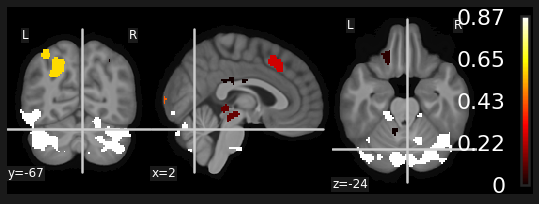

In [27]:
plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con0012_p05_clustere_corrp_tstat1.nii.gz',
                      bg_img = anat_mean,
#                       threshold = 0
                      )

p = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con0012_p05_clustere_corrp_tstat1.nii.gz')

p_data = p.get_data()
np.max(p_data)

## TFCE

Positive SV maps <a class = "anchor" id = "tfce_pos-bullet"></a>

In [ ]:
con_id = '0013'

con_all = {}

for i in sub_num:
    con_image = glob.glob('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/1stLevel/_subject_id_' + str(i) + '/con_' + con_id + '.nii')
    con_all[str(i)] = list(con_image)
# con_all
# len(con_all)

# smooth, fwhm = none
smooth_con_all = []

for k, v in con_all.items():
    smooth_con = image.smooth_img(v[0],None) #  If fwhm is None, no filtering is performed (useful when just removal of non-finite values is needed).
    print(v)
    smooth_con_all.append(smooth_con)
    
#     plotting.plot_glass_brain(smooth_con, colorbar = True)

# concatenate
con_concat = image.concat_imgs(smooth_con_all, auto_resample = True)
con_concat.to_filename(os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'mon_sv_glm_con%s_all_sub.nii.gz' %con_id))


cluster_thr = fsl.Randomise(in_file = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'mon_sv_glm_con%s_all_sub.nii.gz' %con_id),
                            mask = '/home/rj299/scratch60/mdm_analysis/output/imaging/wb_mask_group.nii.gz',
                            base_name = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'con%s' %con_id),
                            one_sample_group_mean = True,
                            tfce = True,
                            vox_p_values = True,
                            num_perm = 5000)
cluster_thr.run()

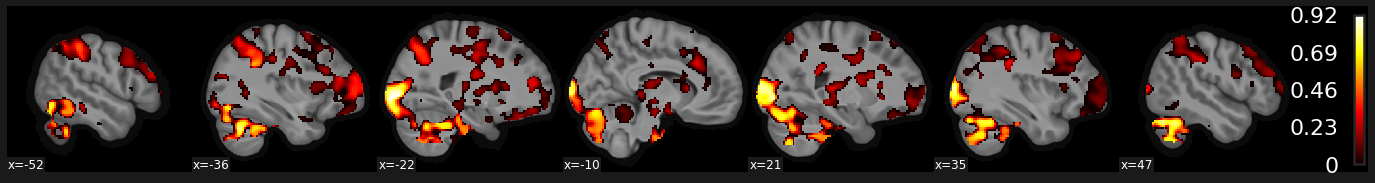

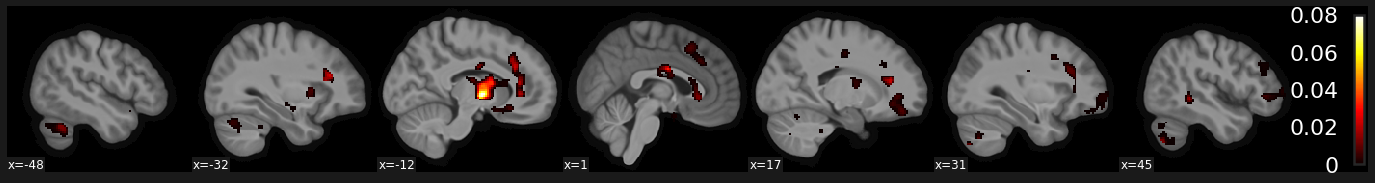

In [13]:
# p maps
con_ids = ['0012', '0013']
# con_id = '0013'

for con_id in con_ids:

    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_tfce_corrp_tstat1.nii.gz' %con_id,
                          bg_img = anat_mean,
                           display_mode = 'x',
                           colorbar=True)
    
#     plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/sv_map_correction/con%s_tfce_corrp_tstat1.nii.gz' %con_id,
#                           bg_img = anat_mean,
#                            display_mode = 'x',
#                            threshold = 0.8, 
#                            colorbar=True)

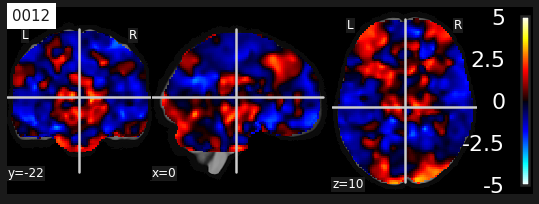

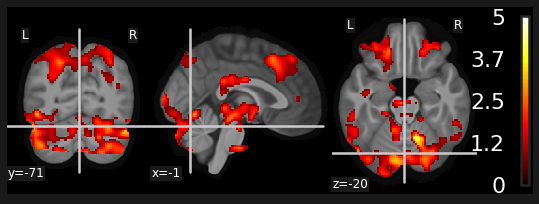

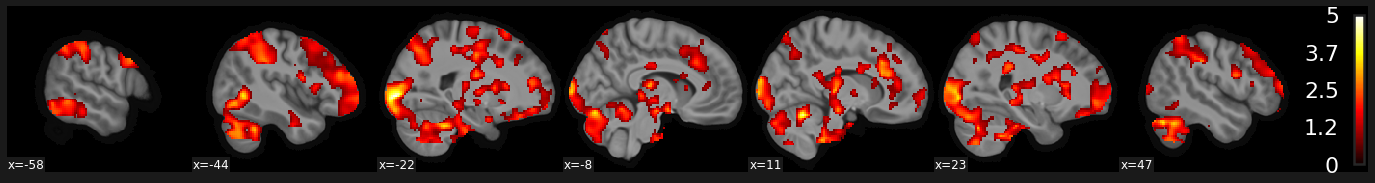

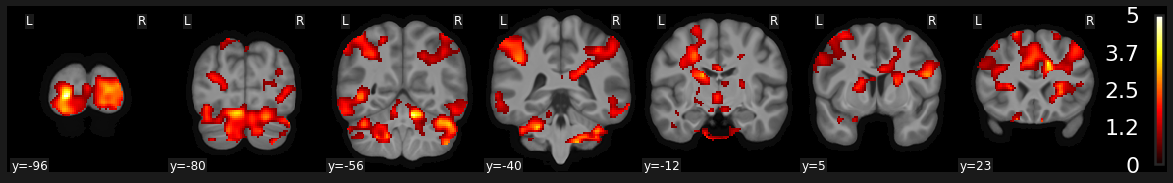

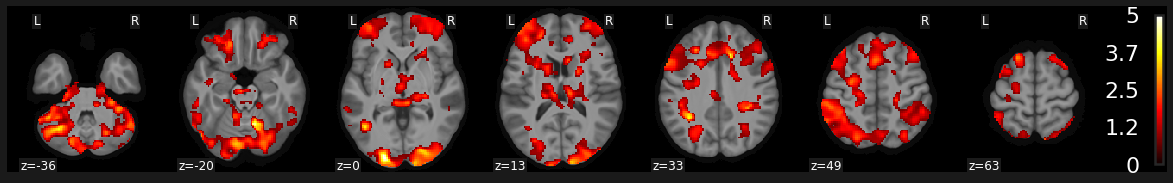

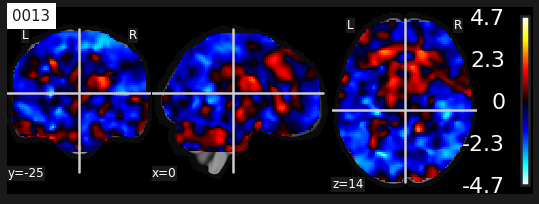

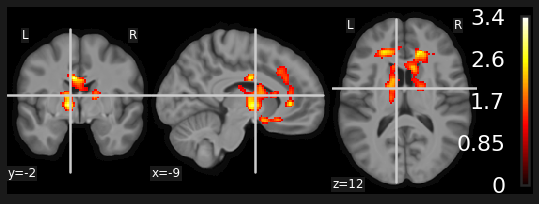

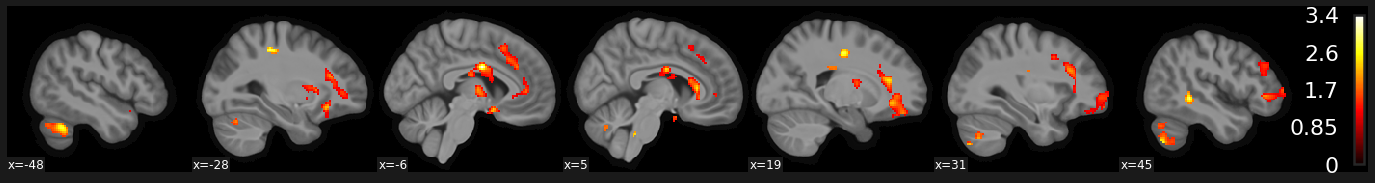

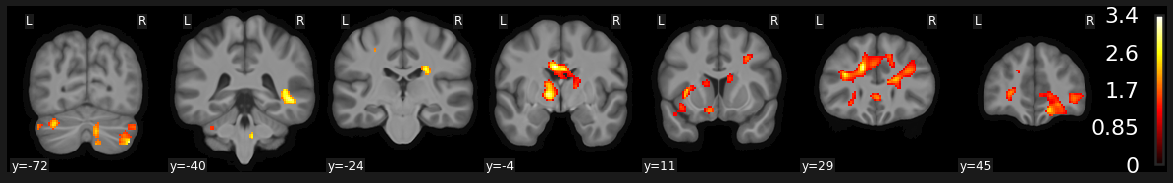

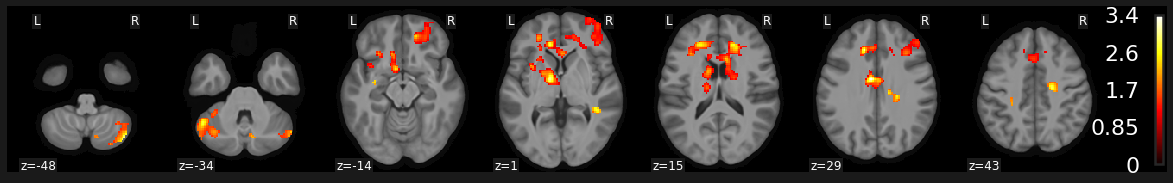

In [14]:
# visualize thresholded t values
con_ids = ['0012', '0013']


for con_id in con_ids:
    
    t_plot = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_tstat1.nii.gz' %con_id)
    p = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_tfce_corrp_tstat1.nii.gz' %con_id)

    # thr = 0.95
    t_plot_data = t_plot.get_data()
    p_data = p.get_data()

    # threshold raw t map by p values
    p_mask = p_data == 0
    t_plot_data[p_mask] = 0    
    
    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_tstat1.nii.gz' %con_id,
                          bg_img = anat_mean,
                          title = con_id)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="x", 
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="y",
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="z",
                           colorbar=True)

Flipped, Negative SV maps <a class = "anchor" id = "tfce_neg-bullet"></a>

In [ ]:
# flipped
con_ids = ['0012', '0013']

for con_id in con_ids:
#     con_id = '0010'

    con_all = {}

    for i in sub_num:
        con_image = glob.glob('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/1stLevel/_subject_id_' + str(i) + '/con_' + con_id + '.nii')
        con_all[str(i)] = list(con_image)
    # con_all
    # len(con_all)

    # smooth, fwhm = none
    smooth_con_all = []

    for k, v in con_all.items():
        smooth_con = image.smooth_img(v[0],None) #  If fwhm is None, no filtering is performed (useful when just removal of non-finite values is needed).
        smooth_con_all.append(smooth_con)

    #     plotting.plot_glass_brain(smooth_con, colorbar = True)

    # flip sign for negative SV maps
    smooth_con_flip_all = []

    for smooth_img in smooth_con_all:
        smooth_img_flip = image.math_img("-img", img=smooth_img)
        smooth_con_flip_all.append(smooth_img_flip)

    # concatenate    
    con_concat_flip = image.concat_imgs(smooth_con_flip_all, auto_resample = True)
    con_concat_flip.to_filename(os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'mon_sv_glm_con%s_flip_all_sub.nii.gz' %con_id))


    cluster_thr = fsl.Randomise(in_file = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'mon_sv_glm_con%s_flip_all_sub.nii.gz' %con_id),
                                mask = '/home/rj299/scratch60/mdm_analysis/output/imaging/wb_mask_group.nii.gz',
                                base_name = os.path.join(out_root, 'imaging', 'Sink_resp_mon_sv', 'con%s_flip' %con_id),
                                one_sample_group_mean = True,
                                tfce = True,
                                vox_p_values = True,
                                num_perm = 5000)
    cluster_thr.run()

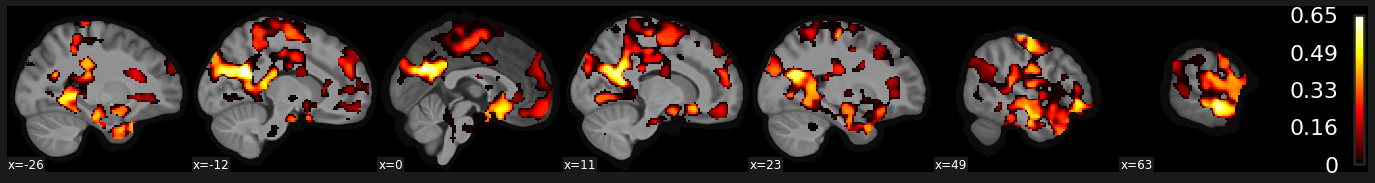

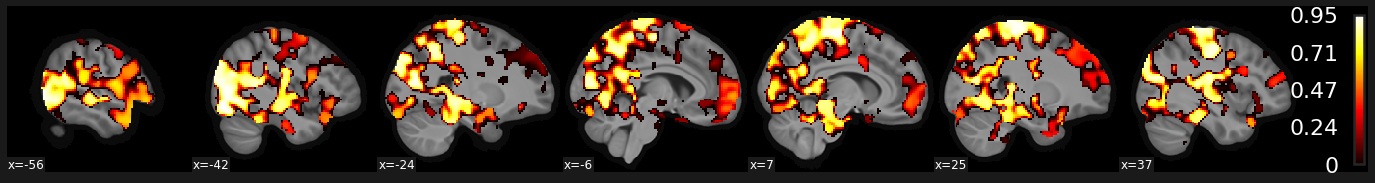

In [4]:
# p maps
con_ids = ['0012', '0013']
# con_id = '0013'

for con_id in con_ids:

    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_flip_tfce_corrp_tstat1.nii.gz' %con_id,
                          bg_img = anat_mean,
                           display_mode = 'x',
#                            threshold = 8,
                           colorbar=True)
    

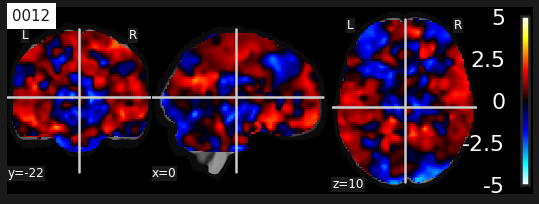

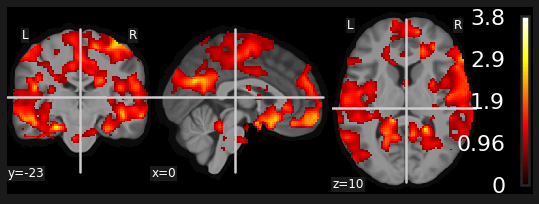

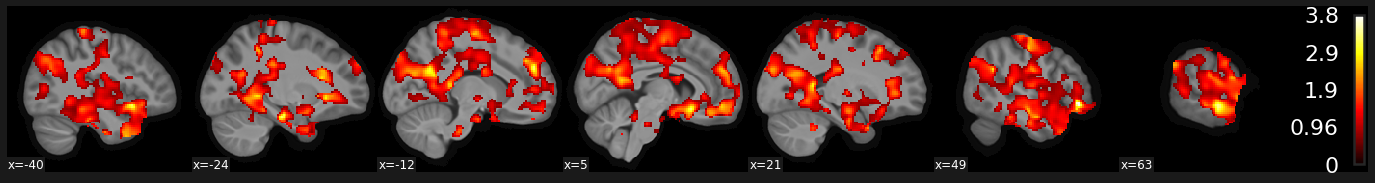

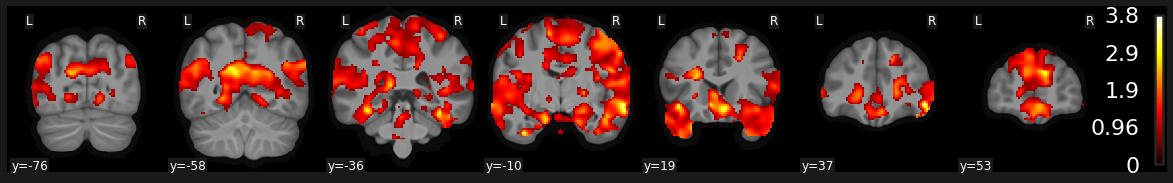

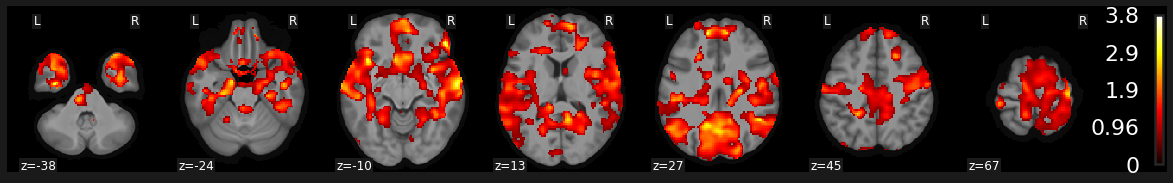

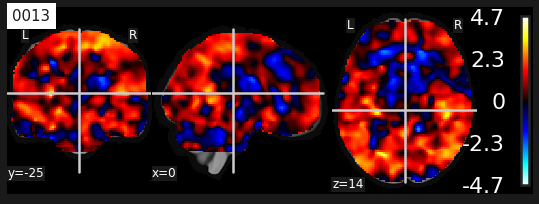

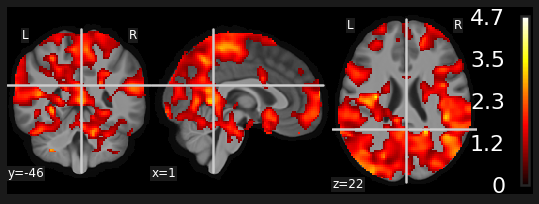

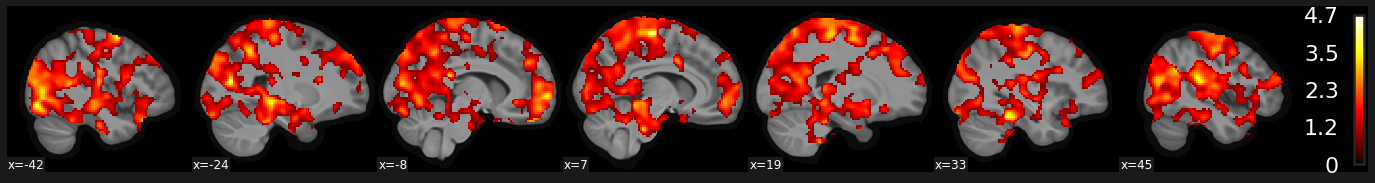

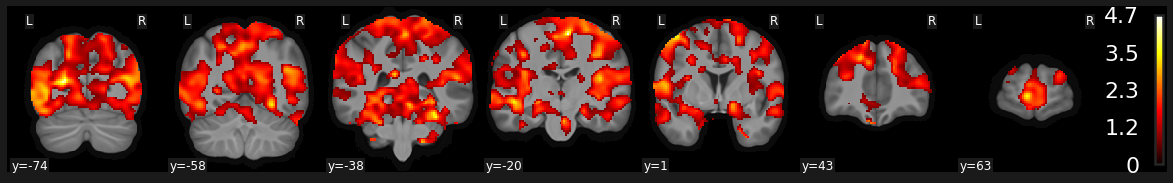

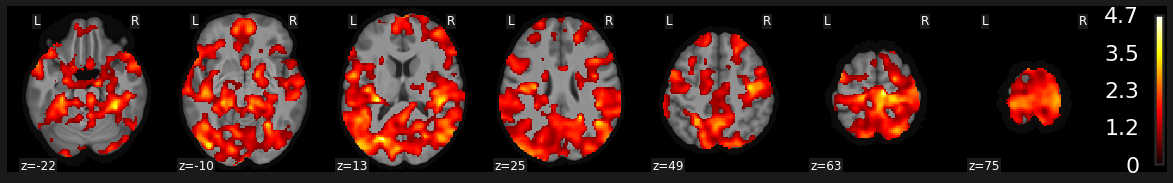

In [9]:
# visualize thresholded t values
con_ids = ['0012', '0013']


for con_id in con_ids:
    
    t_plot = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_flip_tstat1.nii.gz' %con_id)
    p = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_flip_tfce_corrp_tstat1.nii.gz' %con_id)

#     thr = 0.95
    t_plot_data = t_plot.get_data()
    p_data = p.get_data()

    # threshold raw t map by p values
#     p_mask = p_data < thr
    p_mask = p_data == 0
    t_plot_data[p_mask] = 0    
    
    plotting.plot_stat_map('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_resp_mon_sv/con%s_flip_tstat1.nii.gz' %con_id,
                          bg_img = anat_mean,
                          title = con_id)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="x", 
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="y",
                           colorbar=True)

    plotting.plot_stat_map(t_plot,
                          bg_img = anat_mean,
                           display_mode="z",
                           colorbar=True)